In [38]:
import math

inputs = [76542,
97993,
79222,
55538,
126710,
77603,
67546,
129345,
60846,
52191,
126281,
85662,
79245,
78514,
91236,
126982,
94593,
63104,
96955,
122919,
92047,
63529,
75949,
65479,
116132,
55851,
100051,
120419,
79243,
109752,
57719,
131000,
99825,
92855,
111945,
58349,
104867,
53638,
110072,
111190,
126422,
72304,
62865,
113793,
98395,
86596,
89219,
135417,
113665,
87273,
144161,
97285,
136308,
79486,
140622,
138221,
115714,
142175,
114524,
50519,
112963,
109686,
113104,
50622,
102019,
96717,
148433,
70861,
133918,
89471,
112281,
109168,
68965,
109233,
101051,
52587,
65339,
97698,
126416,
61012,
120883,
81018,
60398,
112250,
64253,
98120,
74640,
134790,
80984,
61221,
119815,
96125,
96105,
87124,
60042,
141705,
57290,
57881,
131585,
51360
]

In [50]:
def fuel_from_mass(mass):
    return math.floor(mass / 3.) - 2

def fuel_from_fuel(fuel):
    new_fuel = fuel_from_mass(fuel)
    if new_fuel < 0:
        return 0
    return new_fuel + fuel_from_fuel(new_fuel)

def fuel_from_mass_and_fuel(mass):
    fuel = fuel_from_mass(mass)
    return fuel + fuel_from_fuel(fuel)

mass = sum(inputs)
print(f'total mass of modules is {mass}')
fuel = sum(map(fuel_from_mass, inputs))
print(f'fuel needed for module masses is {fuel}')
fuel = sum(map(fuel_from_mass_and_fuel, inputs))
print(f'total fuel needed is {fuel}')

total mass of modules is 9463036
fuel needed for module masses is 3154112
total fuel needed is 4728317


In [102]:
inputs = [1,12,2,3,
          1,1,2,3,
          1,3,4,3,
          1,5,0,3,
          2,10,1,19,
          1,19,6,23,
          2,13,23,27,
          1,27,13,31,
          1,9,31,35,
          1,35,9,39,
          1,39,5,43,
          2,6,43,47,
          1,47,6,51,
          2,51,9,55,
          2,55,13,59,
          1,59,6,63,
          1,10,63,67,
          2,67,9,71,
          2,6,71,75,
          1,75,5,79,
          2,79,10,83,
          1,5,83,87,
          2,9,87,91,
          1,5,91,95,
          2,13,95,99,
          1,99,10,103,
          1,103,2,107,
          1,107,6,0,
          99,
          2,14,0,0]

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

ops = {1: lambda x, y: x + y,
       2:lambda x, y: x * y}
def perform(tape, op, x, y, out):
    tape[out] = ops[op](tape[x], tape[y])
    return tape

def run(tape):
    for i in range(0, len(tape), 4):
        op = tape[i]
        if op == 99:
            break
        x, y, out = tape[i + 1:i + 4]
        tape = perform(tape, op, x, y, out)
    return tape[0]

def init(tape, noun, verb):
    tape[1] = noun
    tape[2] = verb
    return tape, 100 * noun + verb

inputs, answer = init(inputs, 90, 74)
print(run(inputs), answer) # 19690720

19690720 9074


In [81]:
import numpy as np

s1 = 'R1003,U741,L919,U341,L204,U723,L113,D340,L810,D238,R750,U409,L104,U65,R119,U58,R94,D738,L543,U702,R612,D998,L580,U887,R664,D988,R232,D575,R462,U130,L386,U386,L217,U155,L68,U798,R792,U149,L573,D448,R76,U896,L745,D640,L783,D19,R567,D271,R618,U677,L449,D651,L843,D117,L636,U329,R484,U853,L523,U815,L765,U834,L500,U321,R874,U90,R473,U31,R846,U549,L70,U848,R677,D557,L702,U90,R78,U234,R282,D289,L952,D514,R308,U255,R752,D338,L134,D335,L207,U167,R746,U328,L65,D579,R894,U716,R510,D932,L396,U766,L981,D115,L668,U197,R773,U898,L22,U294,L548,D634,L31,U626,R596,U442,L103,U448,R826,U511,R732,U680,L279,D693,R292,U641,R253,U977,R699,U861,R534,D482,L481,U929,L244,U863,L951,D744,R775,U198,L658,U700,L740,U725,R286,D105,L629,D117,L991,D778,L627,D389,R942,D17,L791,D515,R231,U418,L497,D421,L508,U91,R841,D823,L88,U265,L223,D393,L399,D390,L431,D553,R40,U724,L566,U121,L436,U797,L42,U13,R19,D858,R912,D571,L207,D5,L981,D996,R814,D918,L16,U872,L5,U281,R706,U596,R827,D19,R976,D664,L930,U56,R168,D892,R661,D751,R219,U343,R120,U21,L659,U976,R498,U282,R1,U721,R475,D798,L5,U396,R268,D454,R118,U260,L709,D369,R96,D232,L320,D763,R548,U670,R102,D253,L947,U845,R888,D645,L734,D734,L459,D638,L82,U933,L485,U235,R181,D51,L45,D979,L74,D186,L513,U974,R283,D493,R128,U909,L96,D861,L291,U640,R793,D712,R421,D315,L152,U220,L252,U642,R126,D417,R137,D73,R1,D711,R880,U718,R104,U444,L36,D974,L360,U12,L890,D337,R184,D745,R164,D931,R915,D999,R452,U221,L399,D761,L987,U562,R25,D642,R411,D605,R964'
s2 = 'L1010,U302,L697,D105,R618,U591,R185,U931,R595,D881,L50,D744,L320,D342,L221,D201,L862,D959,R553,D135,L238,U719,L418,U798,R861,U80,L571,U774,L896,U772,L960,U368,R415,D560,R276,U33,L532,U957,R621,D137,R373,U53,L842,U118,L299,U203,L352,D531,R118,U816,R355,U678,L983,D175,R652,U230,R190,D402,R111,D842,R756,D961,L82,U206,L576,U910,R622,D494,R630,D893,L200,U943,L696,D573,L143,D640,L885,D184,L52,D96,L580,U204,L793,D806,R477,D651,L348,D318,L924,D700,R675,D689,L723,D418,L156,D215,L943,D397,L301,U350,R922,D721,R14,U399,L774,U326,L14,D465,L65,U697,R564,D4,L40,D250,R914,U901,R316,U366,R877,D222,L672,D329,L560,U882,R321,D169,R161,U891,L552,U86,L194,D274,L567,D669,L682,U60,L985,U401,R587,U569,L1,D325,L73,U814,L338,U618,L49,U67,L258,D596,R493,D249,L310,D603,R810,D735,L829,D378,R65,U85,L765,D854,L863,U989,L595,U564,L373,U76,R923,U760,L965,U458,L610,U461,R900,U151,L650,D437,L1,U464,L65,D349,R256,D376,L686,U183,L403,D354,R867,U993,R819,D333,L249,U466,L39,D878,R855,U166,L254,D532,L909,U48,L980,U652,R393,D291,L502,U230,L738,U681,L393,U935,L333,D139,L499,D813,R302,D415,L693,D404,L308,D603,R968,U753,L510,D356,L356,U620,R386,D205,R587,U212,R715,U360,L603,U792,R58,U619,R73,D958,L53,D666,L756,U71,L621,D576,L174,U779,L382,U977,R890,D830,R822,U312,R716,U767,R36,U340,R322,D175,L417,U710,L313,D526,L573,D90,L493,D257,L918,U425,R93,D552,L691,U792,R189,U43,L633,U934,L953,U817,L404,D904,L384,D15,L670,D889,L648,U751,L928,D744,L932,U761,R879,D229,R491,U902,R134,D219,L634,U423,L241'

#s1 = 'R75,D30,R83,U83,L12,D49,R71,U7,L72'
#s2 = 'U62,R66,U55,R34,D71,R55,D58,R83'

#s1 = 'R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51'
#s2 = 'U98,R91,D20,R16,D67,R40,U7,R15,U6,R7'

s1 = s1.split(',')
s2 = s2.split(',')

wire_1 = [[0, 0]]
wire_2 = [[0, 0]]

num_steps = {}

def pos_to_str(pos):
    return f'{pos[0]},{pos[1]}'

def add_to_dict(num_steps, pos, step):
    pos = pos_to_str(pos)
    if pos in num_steps:
        num_steps[pos] = min(num_steps[pos], step)

def step(d, m, wire):
    if d == 'R':
        wire.extend([[wire[-1][0] + i, wire[-1][1]] for i in range(1, m + 1)])
    if d == 'L':
        wire.extend([[wire[-1][0] - i, wire[-1][1]] for i in range(1, m + 1)])
    if d == 'U':
        wire.extend([[wire[-1][0], wire[-1][1] + i] for i in range(1, m + 1)])
    if d == 'D':
        wire.extend([[wire[-1][0], wire[-1][1] - i] for i in range(1, m + 1)])
    return wire

def move(op, wire):
    d = op[0]
    m = int(op[1:])
    wire = step(d, m, wire)
    return wire

def get_intersections(wire_1, wire_2):
    w1 = map(pos_to_str, wire_1)
    w2 = map(pos_to_str, wire_2)
    intersections = list(set(w1).intersection(w2))
    intersections = [list(map(int, pos.split(','))) for pos in intersections]
    intersections.remove([0, 0])
    steps = []
    for pos in intersections:
        w1_steps = wire_1.index(pos)
        w2_steps = wire_2.index(pos)
        steps.append([w1_steps, w2_steps])
    return intersections, steps

def manhattan_dist(pos):
    return abs(pos[0]) + abs(pos[1])

def get_min_distance(intersections):
    return min([manhattan_dist(pos) for pos in intersections])

def get_min_steps(steps):
    return min([sum(s) for s in steps])

for op in s1:
    wire_1 = move(op, wire_1)
for op in s2:
    wire_2 = move(op, wire_2)

intersections, steps = get_intersections(wire_1, wire_2)
min_dist = get_min_distance(intersections)
min_steps = get_min_steps(steps)
print(min_dist)
print(min_steps)

1084
9240


In [1]:
low = 357253
high = 892942

def six_digits(code):
    return len(str(code)) == 6

def in_range(code):
    return low <= code and code <= high

def two_adjacent(code):
    code = str(code)
    # pair is at the start or end
    if (code[0] == code[1] and code[1] != code[2]) or (code[3] != code[4] and code[4] == code[5]):
            return True
    for i in range(len(code) - 3):
        a, b, c, d = code[i:i + 4]
        # two adjacent are the same and others around are different
        if a != b and b == c and c != d:
            return True
    return False

def non_decreasing(code):
    code = str(code)
    for i in range(len(code) - 1):
        a = code[i]
        b = code[i + 1]
        if a > b:
            return False
    return True

def all_checks(code):
    return six_digits(code) and in_range(code) and two_adjacent(code) and non_decreasing(code)

num_possible = sum([all_checks(code) for code in range(low, high + 1)])
print(num_possible)

324


In [122]:
inputs = [3,225,1,225,6,6,1100,1,238,225,104,0,101,71,150,224,101,-123,224,224,4,224,102,8,223,223,101,2,224,224,1,224,223,223,2,205,209,224,1001,224,-3403,224,4,224,1002,223,8,223,101,1,224,224,1,223,224,223,1101,55,24,224,1001,224,-79,224,4,224,1002,223,8,223,101,1,224,224,1,223,224,223,1,153,218,224,1001,224,-109,224,4,224,1002,223,8,223,101,5,224,224,1,224,223,223,1002,201,72,224,1001,224,-2088,224,4,224,102,8,223,223,101,3,224,224,1,223,224,223,1102,70,29,225,102,5,214,224,101,-250,224,224,4,224,1002,223,8,223,1001,224,3,224,1,223,224,223,1101,12,52,225,1101,60,71,225,1001,123,41,224,1001,224,-111,224,4,224,102,8,223,223,1001,224,2,224,1,223,224,223,1102,78,66,224,1001,224,-5148,224,4,224,1002,223,8,223,1001,224,2,224,1,223,224,223,1101,29,77,225,1102,41,67,225,1102,83,32,225,1101,93,50,225,1102,53,49,225,4,223,99,0,0,0,677,0,0,0,0,0,0,0,0,0,0,0,1105,0,99999,1105,227,247,1105,1,99999,1005,227,99999,1005,0,256,1105,1,99999,1106,227,99999,1106,0,265,1105,1,99999,1006,0,99999,1006,227,274,1105,1,99999,1105,1,280,1105,1,99999,1,225,225,225,1101,294,0,0,105,1,0,1105,1,99999,1106,0,300,1105,1,99999,1,225,225,225,1101,314,0,0,106,0,0,1105,1,99999,1107,677,677,224,1002,223,2,223,1005,224,329,101,1,223,223,7,677,677,224,1002,223,2,223,1005,224,344,1001,223,1,223,7,226,677,224,102,2,223,223,1006,224,359,101,1,223,223,1108,226,226,224,1002,223,2,223,1005,224,374,1001,223,1,223,8,226,677,224,1002,223,2,223,1006,224,389,1001,223,1,223,1108,226,677,224,1002,223,2,223,1006,224,404,101,1,223,223,1107,677,226,224,102,2,223,223,1006,224,419,101,1,223,223,1007,677,677,224,1002,223,2,223,1005,224,434,101,1,223,223,7,677,226,224,102,2,223,223,1006,224,449,1001,223,1,223,1008,226,677,224,1002,223,2,223,1006,224,464,101,1,223,223,8,677,677,224,1002,223,2,223,1006,224,479,101,1,223,223,108,226,226,224,102,2,223,223,1005,224,494,101,1,223,223,1107,226,677,224,1002,223,2,223,1006,224,509,101,1,223,223,107,226,226,224,1002,223,2,223,1006,224,524,1001,223,1,223,107,677,677,224,1002,223,2,223,1005,224,539,101,1,223,223,1007,226,226,224,102,2,223,223,1006,224,554,101,1,223,223,108,677,677,224,102,2,223,223,1005,224,569,101,1,223,223,107,677,226,224,102,2,223,223,1005,224,584,101,1,223,223,1008,226,226,224,102,2,223,223,1006,224,599,101,1,223,223,1108,677,226,224,1002,223,2,223,1006,224,614,101,1,223,223,8,677,226,224,102,2,223,223,1005,224,629,1001,223,1,223,1008,677,677,224,102,2,223,223,1006,224,644,101,1,223,223,1007,226,677,224,102,2,223,223,1005,224,659,101,1,223,223,108,226,677,224,102,2,223,223,1006,224,674,101,1,223,223,4,223,99,226]
#inputs = [3, 4, 1002, 4, 0, 4, 3, 18, 1, 4, 18, 4, 1001, 4, 100, 4, 4, 4, 0]
#inputs = [1002,4,3,4,33]
#inputs = [3,0,4,0,99]
#inputs = [1101,100,-1,4,0]
#inputs = [3,9,8,9,10,9,4,9,99,-1,8] # equal to 8
#inputs = [3,9,7,9,10,9,4,9,99,-1,8] # less than 8
#inputs = [3,3,1108,-1,8,3,4,3,99] # equal to 8 in immediate mode
#inputs = [3,3,1107,-1,8,3,4,3,99] # less than 8 in immediate mode
#inputs = [3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9]
#inputs = [3,3,1105,-1,9,1101,0,0,12,4,12,99,1]
#inputs = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

ops = {
       1: lambda x, y: x + y,
       2: lambda x, y: x * y,
       3: lambda: int(input()),
       4: lambda x: print(f'diagnostic code is {x}'),
       5: lambda i, x, y: y if x != 0 else i + 2,
       6: lambda i, x, y: y if x == 0 else i + 2,
       7: lambda x, y: int(x < y),
       8: lambda x, y: int(x == y)
      }

def perform(tape, op, modes, x, y, out):
    a = tape[x] if modes[-1] == 0 else x
    b = tape[y] if modes[-2] == 0 else y
    tape[out] = ops[op](a, b)
    return tape

def get_op_and_modes(a):
    a = str(a).zfill(5)
    modes = list(map(int, a[:-2]))
    op = int(a[-2:])
    return op, modes

def run(tape):
    i = 0
    while True:
        #print(i, tape)
        op, modes = get_op_and_modes(tape[i])
        #print(tape[i], op, modes)
        i += 1
        if op == 99:
            break
        elif op in [1, 2, 7, 8]:
            x, y, out = tape[i:i + 3]
            tape = perform(tape, op, modes, x, y, out)
            i += 3
        elif op in [3]: # take input
            tape[tape[i]] = ops[op]()
            i += 1
        elif op in [4]: # output and exit
            x = tape[i]
            x = tape[x] if modes[-1] == 0 else x
            ops[op](x)
            i += 1
        elif op in [5, 6]:
            x, y = tape[i:i + 2]
            a = tape[x] if modes[-1] == 0 else x
            b = tape[y] if modes[-2] == 0 else y
            i = ops[op](i, a, b)

run(inputs) # 12648139

 5


diagnostic code is 12648139


In [9]:
inputs = '''CYP)BC6
FPL)G1W
6MM)5MX
CXK)W4F
TW9)KG3
7LR)RVF
9LK)MJF
FZT)G7N
4F5)YJH
PJF)DJV
JYT)3WQ
839)Q21
8CW)NGC
564)8T3
M86)3NM
XSL)814
MH7)LDS
DKB)742
FWR)NDK
RFZ)B5P
MLZ)YZQ
3RK)FZB
X46)NQ1
Y64)VDS
H79)LPF
G4Q)HSZ
76X)37N
5X1)7PF
YT3)8RH
QPY)32L
3M3)XY4
Z9Z)ZP1
MZ1)H8X
2RY)VW7
8CB)L95
RQF)1NR
JRX)2N9
YV3)4R2
XKB)MFH
13H)1BW
WQS)XBR
WQ9)GQP
HGX)7G5
ZT8)7C6
DHD)HSD
TCX)7P7
8NF)KTM
FG4)V8D
C49)DJK
KBZ)MFF
9SG)DBC
YWQ)HF1
Y7T)7RN
6YM)BV6
B41)P1W
PSF)NLC
9VN)W8W
YS5)6RK
NLH)ZH9
S8D)2BJ
923)9RJ
VGK)D33
SL1)7LT
ZM4)S6L
G1P)QFG
RLW)6TK
NDK)DXV
DFN)7GM
B6Z)FL7
4JP)JCR
DQF)8CN
7PB)F3V
7QM)116
1WM)WS8
LLC)1YP
GP2)M37
DX1)V6G
VJZ)J4F
YPL)J14
712)2TM
37N)9RS
PV1)5F9
DJ7)125
TB3)JK3
YZQ)G13
NMV)M64
9WN)B6Z
Q62)3V6
3NM)N21
LBN)T51
KGL)TQ3
9P4)123
TRY)24T
K62)3QZ
D3K)MZD
Q33)GH3
8PZ)DRD
845)KZX
FH9)G1P
CT6)CZN
39L)S1T
GTP)HDP
NYH)VFT
Z7P)1B7
G87)ZPQ
M98)2PZ
T6K)YQB
KBP)8WY
Q6F)VZC
9Q7)DNQ
Y4T)C21
5VW)G32
K1S)Y64
7TW)QT6
TM2)LBM
GZ1)HBJ
K45)RPX
DGB)NF5
TZN)CQP
3M3)TJ1
STY)VH9
7KG)TSY
9QH)6ZW
TDN)TVJ
ZR4)KP8
D6Y)56K
4Q1)PQR
3X2)WVF
W4B)W6R
SWJ)4Q1
N6R)67W
R5F)15N
F17)GTS
7MF)H1Z
36V)KXV
131)JZC
5G3)KHV
J5R)HB2
2CD)LFV
MG5)YPV
859)1Y7
85D)6LW
TFP)5CJ
QZ2)JBW
C7L)86Y
1TJ)F5F
4GC)VM9
W6W)XV5
5LX)H82
4Q1)HL2
C9P)1CZ
SC8)WQS
78G)P4B
FF5)5PV
36J)YMC
8TM)QHV
793)XS6
P7F)TMJ
46W)DC2
YRZ)5F2
GHQ)5VW
7LY)W59
FZ8)SAN
W7K)R75
ZL8)HWH
DJV)X7C
MML)QCB
D5Y)R6R
2ZP)516
9KL)V35
P7P)HSN
H45)RTT
N6F)FWR
GB3)LL3
HPQ)LM3
2XS)6MM
YMC)HYL
X7B)Z2N
2ZD)217
D33)X7B
RKH)7TW
MMV)131
3TJ)L88
5F6)BJQ
MJ9)9FT
K4C)M99
NQM)HGQ
RQ2)SB9
J5G)KD3
X84)WF6
794)M77
SPD)844
XTC)RW1
7P7)KXQ
P4G)64X
BTR)57D
32Y)SJP
J3W)9QH
JTX)FPR
3NW)2ZP
8VC)PMP
PSL)MR8
H5F)BTR
8BT)73H
BSC)36B
F14)9SP
H1K)28T
36B)SJ6
8RH)RGP
JF3)J3W
SGC)DXB
CHY)94Y
RND)VJY
G23)CVN
MR9)FF5
SB9)F2N
NRK)9XQ
J14)8NS
RJ1)578
QG7)N41
R8L)XMZ
7SR)6W4
B7P)2X9
QRV)F9F
LMZ)FB7
F9M)DDH
HB2)H79
SM8)N1G
GMT)5F6
FL7)7MZ
CS8)CKK
CZV)89B
SZP)NJZ
N1G)H6Q
XV7)JX6
5L5)3C3
JCR)7V3
B9S)13H
123)S8B
RZ4)GR4
PV7)FMP
4RG)HX6
BMB)82H
RRK)KB3
FPR)DP3
826)8M2
Y1P)5KC
YSP)Y61
56T)MZ8
J8Q)HTW
Z4C)DTK
WBP)8WP
PN3)7KT
7KT)XK9
LDD)2TP
2X1)HZR
SZ9)WLP
FH9)Q9W
4L4)T4W
FRS)BMK
BTH)WQF
MX9)3ZQ
DG6)K6D
5TR)HD8
KV3)WW3
VCB)BJV
BMK)MX9
QT6)8VC
YDT)NH2
85Y)4JB
GXT)V4Z
7T6)XK4
8YR)SL1
9WL)MPZ
58H)H5Z
L7D)MG5
MNN)5GT
CVN)4M3
XCP)MZJ
JX6)BMB
F9M)VT3
246)3SW
1NX)MG7
6PG)SL3
1PR)8XF
RF7)W6W
VW7)S1D
HKB)C2Y
LH6)Y4T
DLN)4GC
N8R)YK3
QVZ)M3Q
WPW)9TS
PLX)PX8
F5P)FC6
DVZ)D5Y
91S)XCH
J2F)NSL
X9G)PN3
H8X)84H
MD9)C8Z
QNX)CWY
57D)YWX
MGF)7Y6
24W)V27
5WV)W7T
VRF)FPL
844)JVP
TWX)Z6B
63P)2T7
7C6)VR3
C1M)LKR
4ZP)BJG
9D4)69B
GQP)CTM
VCK)R59
HDB)CVL
WQH)M86
DRD)62D
VRR)KV3
XLD)5R2
B36)55B
F69)7T6
36B)NLJ
B5P)Q4Z
Y27)GDG
LHR)DG8
ZQQ)CKC
CYX)SMY
RBF)CBG
PRF)PRH
WW3)B28
DYL)2ZX
RGP)YNJ
DNQ)4R4
QCB)PBV
SK7)7QR
M4S)PJ5
D15)NX8
MZD)BRP
S1B)Q5H
M9V)VSJ
VGK)CGY
GC9)LKT
SDD)F31
KK3)LCB
1FF)4WC
87N)BVX
76M)1RN
ZS5)RND
374)VPW
QBW)X2Q
G51)63B
MC9)F35
T73)JTY
24V)QJN
MWN)S57
NHV)DHT
Y3K)D81
S6L)J5G
WSS)32Y
3SH)K74
SMY)JBJ
ZXP)212
Z85)RM5
HZC)9VN
6F6)8BT
845)KMW
JLZ)ZMW
NDB)1MY
7ZV)DG6
KNN)46W
34H)L5Q
87Q)J3K
4MP)Z7P
BJD)K2R
J31)R2N
585)7HL
3FP)JQS
PYG)Q1N
DC2)WGW
H95)4M1
QK3)13Y
6N4)T87
K4Q)626
HDF)FFQ
TX9)B6S
JTY)ZWR
94M)Y9F
G32)BHL
S4X)JF3
687)ZV9
QLX)T9F
BYK)2XC
PG4)XZ6
F7R)44V
7VL)QFR
DGG)CB1
498)ZS9
S67)X3Z
B22)68Q
G92)K3K
HG7)KBP
V8P)TZN
XZ6)TQD
8GG)TRY
HLF)FRS
YP6)X6X
PB2)R9Y
PCR)L8X
XNT)H22
HSD)Y54
TD1)NDB
ZMW)JYT
BB8)GSN
VN6)P6Q
63Y)QD2
QGJ)9ZM
XMZ)JS6
3BC)P7R
G13)MMC
DBK)96C
7WG)1F5
626)HYQ
96C)DFN
B39)NVP
QF9)6NZ
F3V)FVQ
JYS)GMT
523)SVM
RQ6)VF4
G7N)Z31
V8D)YRK
7GM)QS6
CGY)CBZ
7X4)D4K
HLS)V3C
VDS)39L
KNN)GC9
QS7)DZN
4C3)QX4
QTK)QVZ
RTS)8PZ
486)FZ8
NR7)HRL
GLJ)XLD
CWY)QV2
NH2)54M
WZ3)JZS
TFK)TQN
T5K)SF6
LPR)WB3
6WM)354
R9B)T37
26S)JJG
S24)TCZ
D5L)KSB
KVZ)YT3
7SL)F7R
8SJ)LQ2
5G6)C23
1RN)PSG
BVX)T8Z
X5N)G5W
Y1P)52M
KH1)2YC
RW1)ZY6
5CJ)7BB
WWS)VDF
C8Z)L5G
7QR)79Q
NSR)SXK
BRP)KNN
TJS)PRZ
BMB)T4X
7RG)K9C
HFP)HDB
NGC)B6T
BDR)HW3
NK7)JY9
71W)LWT
7G3)JVR
8M2)XWZ
RFB)MYL
HDP)7S5
WQQ)7QM
Q5H)NKM
ZRF)1XC
YNJ)D8S
M99)5G3
4PS)X1V
TCC)LQW
FD7)BTH
PX8)LSF
P9J)JQR
S15)C36
RNY)S4G
XS6)WCB
C5F)C7P
KKD)XR5
T7K)J3V
HKS)JPL
RK1)65J
DWY)479
D8S)4RG
DV2)T59
9TB)D26
V27)8NL
L2V)3M3
HX6)6H7
8NS)9P4
TFR)7HD
SJ6)TK2
TCC)7ZP
D3F)TMM
RK6)L17
RK6)HZC
BF7)ZTP
52M)1M7
MB3)S4B
L5J)3P8
VCB)MXP
S1T)T5P
DHS)NSR
131)4BV
VWR)R8L
K1D)9LK
796)QRV
CYZ)N31
MMC)HH6
LSF)YZJ
QS6)2ZS
DV9)K65
KT9)P27
CKK)6NB
V4Z)D6N
9WL)5J9
P88)HLF
TMM)7HN
XBQ)JG5
97N)81P
5VH)SDZ
MHF)QP6
NXM)3X2
B3L)ZQL
BM7)4F5
ZGZ)PQS
59F)F7C
6T3)59W
99C)K1X
BTK)4L4
M96)D9B
63Y)7KG
NF5)R4C
SZT)K5G
HZ1)KKD
C3J)J1S
Q21)NKR
1NC)CF2
SVJ)GJB
WNB)12X
QM3)RF4
HW3)VZV
RTT)DT8
7L5)62G
J4F)8DJ
LQW)77T
7GH)X51
33T)5JR
4LX)HC2
5JR)8CB
M5S)VT6
GR4)5HD
9X9)PLW
PQL)WWB
JY9)9SG
SJF)H9D
D9B)9JF
9XQ)BT2
RBD)JQY
5F9)TRS
5MT)XSL
XHP)MMW
HSN)17L
QCM)PGF
BVF)YBG
JS6)S1B
GZ5)B6L
YM2)8YR
P7R)NK7
J2B)J2F
9LF)S9G
4M4)Z9Z
7S5)KY9
M37)22M
QPV)Y1P
8CH)V9L
B6S)GTN
X6X)XLH
GKT)7RW
P6D)8W3
BJQ)Z4C
3ZQ)K1D
L57)BZR
XFX)Z5Y
94Y)F83
DXC)8W2
37S)GS4
ZTH)JX2
DP3)LYY
XBR)6JF
TTY)G51
VL3)SRQ
BNQ)5S8
62G)TMW
JK3)XWW
WDJ)KDJ
4M1)NGJ
Q1N)81K
G7R)GP2
LKT)7ZV
8NT)ZXP
KXQ)LSZ
12X)PD2
L1N)WZY
ZY6)TT4
7P7)6T1
Q2T)HDF
1HW)1CD
NTG)5BS
6G9)WVJ
F5P)GML
VJD)WWS
YVW)PM3
P2Y)ZZ4
JYK)L57
NN1)TW9
B69)YZZ
GRW)2XG
J4Q)HHB
K74)F25
55M)5LX
WR5)JTM
DDG)NRK
Y65)MC9
WVF)PSF
6CD)ZGZ
GSN)Y5X
BX1)ZHN
CLT)SPD
4R4)R2K
JPP)1GH
NKM)PY5
QH8)M8Y
JRX)6WM
Z3T)28Q
SVM)78G
XK9)4BW
ZR4)X9G
5B2)X6W
4BS)5NX
TT4)MGF
TQ1)M4Q
9KS)YWQ
W8W)M8T
QBT)CXK
N41)QLX
CNV)6PG
6T1)99C
125)V2S
QPD)QNX
H5Z)2KX
P9S)1XM
15N)4SM
FJ4)MNL
YPL)JDP
P8L)PLX
WVJ)SQC
V9L)G4Q
Y9L)K1S
1SS)F8X
9WR)F7H
167)15K
814)MSC
Z56)BSS
D5L)NHG
2R5)QGJ
GWT)LPR
ZM9)RWL
XK4)XVV
X2Q)HGG
RLY)2RY
837)7L4
7X4)ZL8
1Q3)1TJ
2KX)Z44
6W4)ZM1
C7J)8J1
17L)TD1
1F5)L2V
WDQ)ZK3
YY8)SFX
H82)4HJ
28T)D94
F5F)XMT
KP8)BZ8
116)9KS
GSK)K66
6QB)HD7
NGP)4X5
PRZ)TTY
WRZ)2YT
BJG)SGR
7ZF)TFK
1MY)826
825)PGZ
PJ5)9WR
PV1)XV7
516)85D
LQK)M96
B6L)LZK
2TM)DYR
FYH)SZ9
LKT)LTW
PDT)79D
WQQ)DYT
7PW)F81
KSB)CNV
BGN)XQJ
MC6)ZVC
2XC)M4S
F7B)PZ2
1YP)QVB
2FY)KT9
TQZ)S7J
3V6)9T9
CBG)XS5
R59)DLS
GT6)793
4BS)FT7
XY4)6LN
9VF)FH9
GSV)6PV
V4H)JLP
72K)CQS
DLN)ZVL
7RS)RQF
K2R)J94
M64)94M
5FD)FJX
5PV)R11
S4B)CVQ
66K)WBP
DZK)Z5S
MZJ)PCR
2FY)BYK
8J1)7RT
N31)GPX
7Y6)HQC
6CQ)W75
7BP)7SL
NCL)3FP
6JF)YPL
XJH)Z56
X6W)CHY
S27)5KS
96R)ZT8
P71)SGT
YQB)B8S
MZ8)DBK
2MY)NX5
GHK)N4C
5GT)YS5
P5K)1MP
96D)QM1
TVJ)PWV
VTR)X84
7HK)78Q
MQK)GBL
MXW)MWN
MNL)VMK
NHM)PQL
WXW)RXQ
B34)1NC
J9D)Y55
V8Z)PDT
MB7)24V
FTQ)8WG
VFT)XCY
22B)8NT
C4W)4ZP
JG5)WSW
PGF)15T
F7H)8CH
L2W)9HB
JLZ)F5P
SRV)HQ3
SLJ)TGQ
NJZ)C7L
M77)DHD
QVB)165
Z6B)QM3
HGQ)QB2
15C)M31
K1X)FKS
RXQ)G7Z
7TF)DKC
7G2)7PM
BNL)KGL
B52)VRR
81P)VGK
P61)LMP
FB2)LBH
Y3Z)5VH
LBD)X4F
H35)CSR
QFR)C9P
DQ9)54N
TJ2)5TR
93B)SP7
BX1)98H
1BQ)BSC
4WC)WR5
VT6)HR2
2BV)J4T
HVC)3F7
SNP)845
V6G)8CW
585)WC9
6GZ)C5Z
VWY)LVH
QV2)VL5
HNT)V4H
HX7)W7K
4HJ)BVF
MZ1)JY6
7DG)69G
LZK)673
V16)SJF
N8R)8XP
SQZ)BTC
63B)66P
MKY)SDD
TR2)6R9
DYT)5WV
V9L)CYX
SJP)R9V
ZTP)NJ6
XVV)DC7
SNP)VJZ
77Y)NYH
8G7)WDH
ZRX)HNB
B6G)QCM
Y82)V9B
KVL)FGP
CFQ)K4Q
T87)GHW
MJG)WKH
DDH)FNZ
86Y)CDJ
LBN)5HX
7JB)4Y3
KG3)8CC
2XG)Z95
CWH)3NW
NB7)MC6
DC2)6Y9
GWD)RPZ
GYH)JTX
PQR)6GT
7PF)F8G
BJV)D1M
GDN)MHF
54N)W4B
X1V)3LL
Y3Y)VWY
T17)Y65
BVR)H1K
H42)56T
22M)BW9
CS8)71W
KMW)143
WWS)RQ6
NMV)J4Q
58F)V8P
MPZ)Q33
DDX)Y3B
LPF)7HH
9RS)RLY
LQW)CWH
9Q7)ZZ9
5S8)96D
D7B)YFZ
8WY)HLS
4SM)P6M
WC9)ZTD
J94)N6F
7L1)2TC
YGY)XW6
HBQ)2X1
742)C49
DQ4)S4X
L8X)B39
WXY)YVW
JX3)YMS
ZWR)3RK
TDH)P14
58H)9BX
Y4Q)8Z6
VCK)KGY
P14)T6K
QB2)96R
P7B)FH8
9RR)2VJ
15T)TLN
75Z)GVQ
N8D)G92
G7Z)KR3
HTW)X7W
CTC)CYZ
59Q)HKB
87N)2BX
GH3)87W
663)RG4
DZW)797
ZNV)MYM
C1C)SM8
HYL)P88
SPB)CZV
S4G)S9M
D7T)J6J
3SW)S7Y
YS5)DDG
WJC)7SR
98H)885
CPT)BGN
GQD)SLJ
XQ7)Z2T
Y5W)55M
TFR)4PS
HQC)SQK
4M3)VPP
GCH)BZ9
644)G5N
MXP)JYN
CBZ)RB3
RGH)SJZ
GVQ)MVL
2WK)MR9
SL3)JRX
VT3)58F
G1C)J9C
KB5)C5D
VT6)SP9
578)ZTH
GBL)H69
M8Y)6DP
CTM)B69
28Q)7DG
H5K)WS7
1NR)62Y
F54)HPQ
GV6)V8Z
Y1D)D15
FFL)J6R
Z2N)7WG
R2N)M9V
21Y)FVT
7RS)5S4
Z19)KJY
W9C)JD5
NNM)NHT
24T)DGG
GB3)GV9
MYL)XF3
H9V)FFL
QM1)KVL
WBP)M7J
F7C)JWR
BWZ)LMZ
Z5Y)7S6
COM)HKS
XFT)GB3
HH6)XFX
R2X)KV7
5W2)F9M
4CK)RFB
71W)8GG
8XP)825
TLN)QXJ
WD9)TXX
R6R)WDY
4N7)DQ4
NKW)85Y
28N)4GR
SRQ)NR7
3SP)63P
99K)GHK
VZC)DYL
D7H)LQK
7HK)H1F
D6N)TG1
P82)C56
JX2)WD1
ZHN)CTR
5KC)S27
24D)7HW
77Y)V1H
N21)Y3Y
DJV)STY
5YQ)837
Z31)H4N
9FT)7PB
79Q)GKT
6JX)QH8
KR3)8ZQ
955)4CK
2X6)L78
ZMW)RBD
D5P)9WL
XMT)PFQ
5MX)KP2
8Z6)CT6
T59)NN1
CZG)N8R
171)712
5FJ)CND
YGY)RTS
6RK)5PY
LVL)P49
TPK)34H
S8L)59R
DXB)LDD
M8T)NCL
5RG)22B
F2N)DGB
W9Y)26L
N8F)VJD
Q4Z)R3P
V35)QZW
13Y)GL2
XZ6)RY8
W6R)9D4
R75)P71
3TX)9K6
D1M)XHP
HQ3)KG1
D4K)585
RGN)HG7
FJX)BVR
NVP)XSV
5BL)GZ5
TSY)PG4
ZV9)DLN
NVN)BTK
M31)QPD
VKS)66K
YPV)MQK
L5B)5JH
HL2)9VF
H9D)SWJ
J3S)XNB
T2J)YOU
3LL)7PW
H88)ZRF
NQ1)1SS
XFS)RW5
GPV)NZ3
TK2)RXV
CC8)VKQ
6FV)CVD
143)GSV
T5P)Y1D
7G5)7ZR
69B)Z85
YFZ)XKZ
MFH)8CK
4GR)PSL
2HK)5W2
J3K)7BY
ZP1)CQX
JGR)KVZ
199)75Z
VL3)5B2
N34)QG7
2T7)QPY
GDG)3TJ
S57)VTX
Y61)WXY
9ZK)JL4
ZJJ)J69
QNX)DJ7
SXK)Y82
R9Y)DDX
Z95)YZ1
CQP)PV1
1CD)24D
JQY)TDH
P9Y)WQ9
W87)69S
M7J)421
XKV)RJH
MG7)Y5W
BJV)GLJ
M37)RK7
HHB)5FD
LJ4)7Q5
Z5S)TCC
5NX)XYH
BZR)MQV
5HX)5DV
2CG)32G
X4F)N4V
DFZ)P7B
DVP)Q6F
PWV)TB3
S9G)TY2
J4T)CPT
LFF)YDT
TMW)L5B
HJJ)B2N
1G6)RFZ
K2R)HN4
PZ2)FRG
FB7)8SV
HZR)S8L
1GW)486
8W2)T97
SJ5)L1N
F8G)58H
C36)DFQ
ZDV)FG4
DFQ)GRW
XWZ)21Y
GPG)8SJ
KJY)GSK
RKK)VV6
ZVC)4ZL
VSJ)MJG
TBG)FD7
SHX)RW4
LF9)9LF
ZV9)KV5
8DJ)SJJ
JLP)XKV
8SV)171
SGR)WDQ
VH9)D3K
F9F)W1Q
VM9)8MH
QX4)PB2
T9F)TBG
JG4)4LT
KKD)7QN
NSL)W87
57J)VB6
WDY)7BP
GSN)2XS
FKS)1NX
QFM)PS9
KGL)VSY
5Q8)G83
D5Y)WRZ
LKR)CLT
DST)TM2
KHV)YGY
XJH)N8F
M8Y)BQ7
QHV)YWT
YK3)D5P
KV5)8F3
DLS)5BL
P5F)ZL2
RVF)GT6
4BV)97N
S8B)62C
HRL)7BF
1Y7)P9Y
WNT)36V
CVD)G1C
D1Z)3SH
PLW)2CG
Z6L)Y8G
ZZ9)GR3
G83)1WM
N38)J8Q
MJF)7JB
D1F)1Y3
8Y5)ND3
K51)YY8
1BW)Y27
GML)MNN
RF4)2Z9
4BM)T73
GS4)LFF
KTM)WFB
85D)NH8
MCD)WM4
2T5)811
8ZQ)B9S
JV1)JHZ
JDP)B7S
7DG)ZNV
G5K)Y4V
M5Y)BZC
G5N)YZ2
XQJ)7NN
54M)CDL
8TV)41S
3JL)6F6
1MP)2T5
VZV)NSP
5S4)MB3
BXT)5FJ
K9B)X5N
H79)72K
B2N)8NH
7HD)7G3
JZC)L7D
WF6)Z3T
VPW)TFP
GMV)CZG
7PB)2HK
W1Q)37S
ZM1)LMJ
14Y)36J
YZ1)CL9
ZDF)2SC
HYL)SNP
Z44)199
6ZW)C4W
7VR)5L5
13V)1FF
CDJ)JBL
YWT)GV6
H22)7N5
CXR)7HK
J6R)T5K
GR3)TX9
73H)9YN
KV7)JX3
MYM)15C
66P)MXW
7ZR)9W5
1WM)JYS
4BC)478
3FP)P7F
DHZ)6T3
GJB)Y3K
HNB)LP6
PY5)6CQ
J3W)MD9
XCH)GZ8
B5P)9PL
ZD2)WD9
SJJ)M9T
9W5)DCP
5B2)ZM4
JY6)26S
Y55)W37
J69)VN6
WM4)RNY
QBJ)QPV
J9C)GTP
8YQ)H42
W78)ZS5
8MH)C3J
MSC)7RS
HPJ)WMS
K66)R5F
7SR)5MT
8W3)28N
TQ3)9KL
2CX)HVC
PY5)76X
T9H)2SD
BNX)97Q
XK9)MZ1
PQS)DH1
1TS)ZR4
K9C)K8D
67W)L8T
CKC)BCX
LMP)7LY
NBD)XQ7
6Y9)61W
1SK)NQM
P1W)RLW
7LR)B52
K5G)T2J
R2K)D1F
7MZ)BWZ
DYR)BNQ
RPZ)M5S
6NZ)V16
ZK3)H35
J3V)HGX
2Z9)D7T
CF2)TGK
NH8)2BV
3F7)QK8
8NH)YP6
R9V)MJ9
GL2)VRF
BWX)1X5
SMH)923
N4V)ZN7
P4B)B36
537)GWD
CHF)XNK
KGY)F54
1Y3)QLD
TJ1)SGC
XS5)RQ2
NFN)RM6
343)NGP
R8L)NMV
TSY)K2H
7HN)P9J
WSW)KK3
XKZ)D5L
LF9)5WX
TY2)93B
HYB)87Q
C56)DHZ
L5G)4BC
9SP)P4G
DVP)L9C
DJ5)Z6L
KMP)SV3
H19)TDN
1B7)9WN
797)P82
6PV)WNB
DBC)DRK
JWR)J2B
MX9)SPB
FSN)BF7
SQC)NBW
WKH)CMV
PFQ)QS7
3WQ)DDB
354)F17
RLW)RF7
TGK)4WP
87T)W78
K1T)XTC
4T1)DZK
JQG)5Q8
Z6B)V82
JPL)57J
2QG)FJ4
L17)W9C
62C)YRZ
P6M)8FV
QD2)RGN
C23)3B3
8CN)ZDV
BW9)JG4
Z2T)523
FFQ)99K
FRS)RBF
MG5)7LR
6LN)QBT
K3K)QTK
WMS)S67
GH3)FB2
K6D)ZRX
TMJ)9PH
2PZ)8YQ
97Q)RGH
F8X)HBQ
5NT)H19
C4W)6YM
F81)Q62
JQR)HB5
FZB)R9B
59W)9ZK
84Y)9VY
T8Z)YPG
9PL)MDM
3TX)7G2
1X5)1GW
KP2)BX1
1M4)K51
9TS)794
26L)H5K
HH6)2FY
HWH)9X9
RW5)MLZ
P9S)GCH
HD8)6CD
RJH)PM2
YJH)4BS
46H)2WK
RLP)D3F
CDL)VTR
M2V)KFH
QX1)DX5
2X9)H6R
WS7)BCZ
2VJ)TR2
FVQ)1TS
KFH)6N4
H1F)T3D
LQ2)SJQ
79D)XCP
2RR)P7P
DS8)PYG
K84)9T5
C2Y)T7K
M9W)9H6
DRK)8QX
69G)HJJ
2ZD)4H2
BCZ)SQZ
5WX)91S
87W)BLG
XR3)9Q7
NLC)KS4
ZPQ)XFT
68Q)S8D
8RH)564
BZ9)NCK
DBS)J31
S7Y)NSH
JBW)QLF
CQS)SZP
8CK)GPG
F35)PRF
562)LJ4
7S6)2X6
8FD)C5F
TRS)CNS
DKC)1G6
9PH)4C3
HR2)1PR
JBL)ZD2
FH8)JGR
1CZ)Q2T
PS9)ZM7
FGP)P8L
VDF)G7R
RY8)644
ZXM)WYR
1SS)VCB
W37)MTQ
TQZ)NB7
9RJ)DVP
RB3)GYH
MZD)N8D
68D)LKC
MMW)CHF
LWX)ZJJ
GV9)N38
T3D)Z19
LL3)H9V
RR5)T8X
5Q8)L13
F8B)PV7
BZR)63Y
1YT)MJ5
L5Q)87T
B2J)Y4Q
K1R)9D5
59R)QFM
JTM)9RR
2SD)ZD7
1M7)3JL
NX8)FSN
LBM)M5Y
YW6)YM2
GWV)955
P31)1YT
CND)VM2
PGZ)5CM
BLG)N6R
4W3)LLC
WVJ)VL3
L88)J9D
837)8FD
XW6)NKW
GPX)GQD
858)5S1
NSH)HPJ
3B3)415
9RZ)7GZ
B28)MPM
7PM)SB1
BSS)M2V
JPX)WZ3
VL5)RRK
T51)JJ2
NLJ)FZT
9L9)R1T
5PY)8TM
9T5)8TV
DDB)XVJ
4SM)VCW
TSH)Y9L
KS4)WJC
55M)S24
CQX)DXC
8WP)P2Y
DQ4)13V
9BX)CS8
D4K)XKB
V82)DVZ
C7P)D9D
MFT)J4M
WS8)DFZ
LZ6)J3Q
FKS)TFR
78Q)LZ6
16R)FYH
GTS)DV9
H1Z)7JW
H5Z)WPW
5HD)RKH
BT2)RJ1
TXX)B6G
212)RKK
VPP)WSS
1XM)YV3
JJG)BMW
VR3)PHX
LWT)24W
CVL)D7B
923)JV1
1SK)K62
P49)P5K
7L4)QBJ
WGW)3NQ
X7C)3SP
KZX)2QG
CL9)VWR
HSN)P5F
M8M)XWS
DWY)DST
7HL)8G7
PBV)W2Y
GQP)4LX
QGJ)MH7
885)WXW
L9C)NFN
YPG)SH1
VSY)H5F
JSR)VWV
WDH)14Y
KHV)DBS
J3S)SC8
TXX)B3L
XF3)H95
4LT)GZ1
MLZ)S15
ZS9)NLH
F14)ZP3
KB5)SVJ
LP6)44K
ZL2)MML
9ZM)GMV
JQS)2GY
5J9)69X
SH1)JPP
D26)5F8
DH1)RK6
D6D)SZT
W2Y)ZSL
15K)P61
GZ8)4W3
YJ4)461
LM3)K45
R3P)TPK
HN6)GHT
W7T)GZT
JVP)43H
LP6)GWT
246)CC8
N9G)J5R
7NN)DCC
LBH)F7B
2TP)YL5
RM6)5RG
KWL)RZ4
HHB)7X4
GR4)984
M9T)HGK
M4Q)JYK
2GY)ZY8
8GG)RSR
F25)D6D
QJN)68D
NJ6)687
5KS)TYC
F83)197
9K6)XR3
YZZ)BNL
5RG)HN6
F31)2ZD
BMW)6G9
QFG)46H
JCR)LWX
HN4)VRM
6TK)Y3Z
S7J)K9B
3QZ)SD7
W59)Q2Z
99C)B2J
61W)JPX
4ZY)SHX
8XF)87N
NSP)S2S
ZTD)859
3NW)M8M
2YT)C7J
421)XJH
T73)F69
ZNV)YW6
QBJ)Y7T
V2S)MMV
ZD7)Z15
JRN)VKS
ZM7)QK3
C84)GHQ
C5D)KJB
DBS)SJ5
7HH)H88
165)R2X
XNK)FTQ
RK7)P31
84H)858
7RW)X46
XLH)VCK
DHR)DZW
GTN)TNP
HYQ)4N7
RW4)7ZF
43H)M98
X7W)5G6
6GT)839
CTR)Z9F
Q8P)GDN
8FV)6QB
L13)2RR
ZVL)KBZ
Q2Z)JLZ
BC6)WQH
MJ5)69L
4R2)G87
SFX)77Y
BWZ)KMP
STY)343
T4X)1HW
WQF)TSH
4X5)3TX
G23)JSR
DNQ)YJ4
JHZ)F14
S42)DWY
HB5)YJ6
HGG)XMD
LYY)KMJ
XYH)BXT
7BB)B7P
ZSL)G5K
G1P)L2W
MFF)HZ1
JJ2)N34
M8M)7TF
FC6)MFT
W59)QHK
5DV)QZ2
J5G)6GZ
8T3)5YQ
7QN)8Y5
1X5)SX3
DV2)H45
RXQ)4M4
L78)LG1
KG1)ZM9
8QX)QSH
MQV)RLP
HD7)B8D
82H)7VR
ZP3)DHR
CNR)LVL
WR5)9RZ
7BY)LBN
ZVC)CXR
Q9W)DQF
2BJ)TCX
JYN)HYB
64X)WNT
Y9F)QBW
BZ8)2R5
PJ1)K5T
TQN)BJD
XVJ)BB8
S2S)BWX
2ZS)K4C
VTX)P6D
KY9)TJS
QHK)5X1
3WJ)L5J
SX3)CFQ
LCB)XTM
MJP)DKB
CSR)ZML
XR3)B41
JD5)N9G
JPX)1BQ
RWL)DX1
YBG)QX1
M33)MKY
5S1)D6Y
TRS)5NK
TNP)LH6
CNS)MCR
J3Q)KWL
T4W)8W9
VJY)6WQ
JBJ)PJ1
2RR)Q8P
J4M)WQQ
69S)TJ2
NCK)16R
6H7)QF9
8Y5)J3S
77T)LBD
KB3)JRN
FNZ)1Q3
KJY)DHS
44V)GWV
NHG)TWX
VRM)BDR
YZJ)BNX
DC7)YXN
MR8)G23
MCR)BM7
HGQ)7L5
YL5)NBD
QB2)DJ5
CB1)4JP
BZC)7RG
VJZ)3BC
VWV)M33
DT7)NTG
DTK)TDB
3P8)T44
JL4)76M
7N5)GPV
ZZ4)9DX
55B)59F
D94)4ZY
5G3)M9W
DHT)SK7
TZN)2CD
QXJ)CNK
WFB)S42
7JW)1SK
X51)CYP
6DP)PBL
5BS)LF9
3NQ)DV2
Y8G)WDJ
4BW)D1Z
1GH)BC2
9H6)7GH
1XC)6FV
NZ3)59Q
8CC)NXM
9WR)7L1
DCC)498
TGQ)85Z
4H2)4T1
VSY)L7R
4ZL)SRV
PHX)2MY
T8X)XBQ
XCY)MCD
5R2)TF6
VKS)JWD
9T9)T17
8F3)XNT
DH1)NVN
VB6)P9S
7Y6)C84
3F7)3WJ
1NY)JQG
LDS)GXT
4WP)HNT
TG1)562
KJB)TQZ
D9D)T9H
XSV)C1M
X3Z)ZMX
RXV)HPL
1BQ)1M4
HNT)4MP
PBL)K84
T97)DT7
65J)CNR
7GZ)PCZ
GHT)ZDF
L7R)W9Y
NHT)HX7
SDZ)MJP
BV6)374
13H)M5L
YXN)XFS
DCP)1NY
SV3)33T
415)B34
8NL)DS8
RM5)796
G1W)RK1
5CJ)SMH
JBL)974
HPL)M3M
XNB)MB7
H9D)DQ9
4JB)6JX
XR5)B22
BMK)RR5
KD3)D7H
76X)CTC
TQD)56X
WZY)84Y
HSZ)663
SJZ)NHV
RSR)7MF
WB3)537
62Y)LHR
H69)26P
811)167
K65)7VL
Q62)3PG
YZ2)C1C
56X)VFS
6WQ)8NF
DP3)PJF
62D)NHM
T44)F8B
NDB)K1T
LVH)HFP
96D)YSP
2N9)4BM
89B)246
T3D)KH1
Y4V)2CX
6DP)TQ1
5CM)9TB
PHX)5NT
6LW)ZQQ
7LT)K1R
HBJ)9L9
XW6)NNM
BCX)KB5
8WG)ZXM'''.split()

inputs = '''COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN'''.split()

def add_node(orbits, a, b):
    if a in orbits:
        orbits[a].append(b)
    else:
        orbits[a] = [b]
    return orbits

def construct_tree(edges, root='COM'):
    tree = {root: []}
    for o in edges:
        a, b = o.split(')')
        orbits = add_node(tree, a, b)
    return tree

def count_subtree(tree, root):
    if root in tree:
        direct_children = len(tree[root])
        return direct_children + sum([count_subtree(tree, child) for child in tree[root]])
    else:
        return 0

# start from root of tree and count all children recursively
# then go to its child and recurse again
def count_orbits(orbits):
    num_orbits = 0
    for node in orbits.keys():
        c = count_subtree(orbits, node)
        num_orbits += c
    return num_orbits

def find_anchor(orbits, node):
    for anchor in orbits.keys():
        if node in orbits[anchor]:
            return anchor

def dist_to_common_ancestor(tree, u, v):
    u_anc = [u]
    v_anc = [v]
    common_anc = set(u_anc).intersection(v_anc)
    while common_anc == set():
        u = find_anchor(orbits, u)
        v = find_anchor(orbits, v)
        u_anc.append(u)
        v_anc.append(v)
        common_anc = set(u_anc).intersection(v_anc)
    u_steps_to_common_anc = u_anc.index(list(common_anc)[0])
    v_steps_to_common_anc = v_anc.index(list(common_anc)[0])
    #print(u_steps_to_common_anc, v_steps_to_common_anc)
    return u_steps_to_common_anc + v_steps_to_common_anc

# part 1
orbits = construct_tree(inputs)
from pprint import pprint
pprint(orbits)
print(count_orbits(orbits))

# part 2
you_anchor = find_anchor(orbits, 'YOU')
san_anchor = find_anchor(orbits, 'SAN')
print(dist_to_common_ancestor(orbits, you_anchor, san_anchor))

{'B': ['C', 'G'],
 'C': ['D'],
 'COM': ['B'],
 'D': ['E', 'I'],
 'E': ['F', 'J'],
 'G': ['H'],
 'I': ['SAN'],
 'J': ['K'],
 'K': ['L', 'YOU']}
54
4


In [53]:
import itertools

inputs = '3,8,1001,8,10,8,105,1,0,0,21,34,43,60,81,94,175,256,337,418,99999,3,9,101,2,9,9,102,4,9,9,4,9,99,3,9,102,2,9,9,4,9,99,3,9,102,4,9,9,1001,9,4,9,102,3,9,9,4,9,99,3,9,102,4,9,9,1001,9,2,9,1002,9,3,9,101,4,9,9,4,9,99,3,9,1001,9,4,9,102,2,9,9,4,9,99,3,9,102,2,9,9,4,9,3,9,1001,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,1001,9,2,9,4,9,3,9,101,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,102,2,9,9,4,9,3,9,1002,9,2,9,4,9,99,3,9,101,2,9,9,4,9,3,9,1001,9,1,9,4,9,3,9,101,1,9,9,4,9,3,9,102,2,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,1001,9,1,9,4,9,3,9,1001,9,2,9,4,9,3,9,101,1,9,9,4,9,3,9,1001,9,1,9,4,9,3,9,1001,9,2,9,4,9,99,3,9,1002,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,1002,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,1001,9,1,9,4,9,3,9,1002,9,2,9,4,9,3,9,1001,9,2,9,4,9,3,9,101,1,9,9,4,9,3,9,101,2,9,9,4,9,3,9,1001,9,2,9,4,9,99,3,9,101,2,9,9,4,9,3,9,101,1,9,9,4,9,3,9,101,1,9,9,4,9,3,9,101,1,9,9,4,9,3,9,1001,9,1,9,4,9,3,9,1001,9,2,9,4,9,3,9,1001,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,1001,9,2,9,4,9,3,9,1002,9,2,9,4,9,99,3,9,1001,9,1,9,4,9,3,9,1001,9,1,9,4,9,3,9,1002,9,2,9,4,9,3,9,1001,9,1,9,4,9,3,9,1002,9,2,9,4,9,3,9,102,2,9,9,4,9,3,9,1001,9,2,9,4,9,3,9,1001,9,2,9,4,9,3,9,101,2,9,9,4,9,3,9,102,2,9,9,4,9,99'.split(',')
#inputs = '3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0'.split(',')
#inputs = '3,26,1001,26,-4,26,3,27,1002,27,2,27,1,27,26,27,4,27,1001,28,-1,28,1005,28,6,99,0,0,5'.split(',')
inputs = list(map(int, inputs))

# 1. output: input * 2 + (phase - 4)
# 2. reduce input counter by one
# 3. if input counter is zero then halt, else jump to 1.

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

ops = {
       1: lambda x, y, i: (x + y, i + 3),
       2: lambda x, y, i: (x * y, i + 3),
       3: lambda x, i: (x, i + 1),
       4: lambda x, i: (x, i + 1),
       5: lambda i, x, y: y if x != 0 else i + 2,
       6: lambda i, x, y: y if x == 0 else i + 2,
       7: lambda x, y, i: (int(x < y), i + 3),
       8: lambda x, y, i: (int(x == y), i + 3)
}

def perform(tape, op, modes, x, y, out, i):
    a = tape[x] if modes[-1] == 0 else x
    b = tape[y] if modes[-2] == 0 else y
    tape[out], i = ops[op](a, b, i)
    return tape, i

def get_op_and_modes(a):
    a = str(a).zfill(5)
    modes = list(map(int, a[:-2]))
    op = int(a[-2:])
    return op, modes

class Amplifier():
    def __init__(self, tape, phase):
        self.tape = tape
        self.phase = phase
        self.phase_init = False
        self.i = 0

    def run(self, input_code):
        while True:
            op, modes = get_op_and_modes(self.tape[self.i])
            self.i += 1
            if op == 99: # halt computation
                return None
            elif op in [1, 2, 7, 8]: # addition, multiplication, and comparisons
                x, y, out = self.tape[self.i:self.i + 3]
                self.tape, self.i = perform(self.tape, op, modes, x, y, out, self.i)
            elif op in [3]: # take input
                code = self.phase if not self.phase_init else input_code
                self.phase_init = True
                self.tape[self.tape[self.i]], self.i = ops[op](code, self.i)
            elif op in [4]: # output value
                x = self.tape[self.i]
                x = self.tape[x] if modes[-1] == 0 else x
                x, self.i = ops[op](x, self.i)
                return x
            elif op in [5, 6]: # jump instructions
                x, y = self.tape[self.i:self.i + 2]
                a = self.tape[x] if modes[-1] == 0 else x
                b = self.tape[y] if modes[-2] == 0 else y
                self.i = ops[op](self.i, a, b)

def run_all_amplifiers(inputs, phases, feedback_mode=False):
    amps = [Amplifier(inputs[:], phases[i]) for i in range(len(phases))]
    amplifier_inputs = [0, None, None, None, None]
    n = len(phases)
    i = 0
    while True:
        input_code = amplifier_inputs[i]
        output_code = amps[i].run(input_code)
        if output_code is None:
            return amplifier_inputs[0]
        amplifier_inputs[(i + 1) % n] = output_code
        i = (i + 1) % n

feedback_mode = True
phase_list = [0, 1, 2, 3, 4] if not feedback_mode else [5, 6, 7, 8, 9]
max_signal = 0
for phases in itertools.permutations(phase_list):
    output_code = run_all_amplifiers(inputs, phases, feedback_mode)
    max_signal = max(max_signal, output_code)
print(max_signal)

1714298


2562


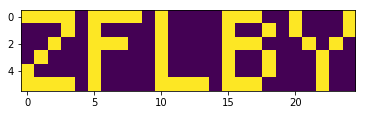

In [47]:
import numpy as np
import matplotlib.pyplot as plt

inputs = '221221212220222221022220222220222022022220222222220222021222222222222222212222022222222222222222220220222122222022220212202222212222220222222222222222222220112221222222222221222222222022022221222222222222022222222222222222222222022222222222222222222221222022222122220222222222202222221222222222222220220220112222222222022222122212222122022220212222221222120222222222222222222222222222222222222222220220222222222022221222222222222222220222222222222222222221002222222221122222122200222222122221212222220222021222222222222222212222022222222222222222221222222122222122220202212222212222221222222222222220220222012220222220022222022221222022022222222122222222020222222222222222222222022222222222222222221222222122222022222202212222212222220222222222222222222221012220222222022221122220222122222220222022221222222222222222222222222222222222222222222222221222222122222022222202212022202222221222222222222220222221012220222222122221022201222022222222222122220222021222222222222222222022022222222222222222220220222022222022222222222122102222220222222222222222222220212220222222222220022211222122122222212022221222022222222222222222212222222222222222222222221222222122222222222212202122022222222222222222222222222222002221222221122222022221222222222220222022220222222222222222222222212222122222222222222222222022222122222222221222202122122222221222222222222220220222202221222222222222222202222122022220212122220222021222222222222222222122122222222222222222221222222022222022222202212122222222220222222222222220222221102222222222022221222211222222022220212222222222222222222222222222212022122222222222220222220021222122222122220222212222012222220222222222222221222221012022222221222221122201222122222222202122222222121222222222222222202222122222222222221222221220222122222122221212212022112222222222222222222221222221212220222222222222122211222122222222202222220222122222222222222222212022222202212222222222222021222022222222221202222122122222221222222222222220222221122121222220122222122222222222022222222122221222021222222222222222222122022212212222221222220021222122222222222022202022202222221222222222222222222222212021222221022222122202222122122220202222222222222222222222222222222122222222202222221222222221222222222122221202222022222222220222222222222221221221222122222221022220022201222221122220212022221222221222222222222222212122122222202222220222220122222022222222220102222022112222222222222222222222222220022120222222122221222222222021122220222022220222122222222222212222202222022202222222221222222122222022222222222022212022022222222222222222222221222222022122222222222221122220222220122222222022220222221122222222202222202222122212212222222222220022222122222222222012212022022222220222222222222220221222012120222220122220122211222022022220212022021222022022222222212222222122222222222222221222221020222222222122221002202122102222221222222222222221221221122222222210222222022222222122222220212122120222222122222222202222222122222202212222221222222220222222222222222002222222012222221222222222222221221221002221222202222221222201222200022221202122221222120202222222202222212122222202202222220220220122222222222122220022202022212222222222222222222220222221222122222221222222022222222010122220202022021220220022222222212222222222222202212222221221222222222122222222222122222122112222222222222222222221220221212222222210122221122222222000102221222022022222120202222222212222222022122202222222220222221020222022222122222202202022122222220222222222222220220221012220222202022220222201222201212222222122220222021202222222222222212222122222222222221221222121222122222022222012212122212222221222222222222220220222012022222221122221222210222001002221212222020220020002222222212222222222222222222222220221220221222222222022021022212222112222222222222222222221220220022022222221022221222212122200122221222222020221121202222222202222222122022202202222221222222121222022222222220222202222202222220222222222222220221221022121222202222220222210122022122221212122221221221202222222212222212022222222222222222220220022222222222122221112202222012222221222222222222222221222022220222211122222122221222221102221212122020220120012222222222222222122222222222222220221221121222022222222220222212222122222220222222222222221221220112120222220122221222201022221122022202122122222122222222222202222202222222222022222221221222020222122222022122022202122022222221222222222222221222222212021222210122220022211122112122122212022021221020212222222222222222122122212112222221222220022222222222222020222222122012222222222222222222222220221202022222221222221022220022110222021222222120220120112222222202222212222222222212222220220220020222022222222021112222122202222221222222222222222221221202022222212122220022200222010112120212222222220020002222222202222202122022212212222222220220021222022222022020102202222122222220222222222222220222222222020222220022222222221222200202122222122121221221102222222202222222122022212122222221222222022222122222222122112202222202222221222222222222221221221212121222222222222122221222121012121202122022221222102222222222222222022022202012222221222222120222222222122021022202022012222222222222222222221222221212220222212122220022020122111122222202222220222222212222222212222212122222222212222220221222222222222222022221112222222122222220222222222222222220220002220222211022221122121022021022121222022121222211112222222202222212222222222212222220222222122222122222022221022222022122222220222222222222220220220122021222222022221122010222111212021202122121221110002222222222222212022122202022222222222222021222022222222122212202122022222222222222222222222221221212220222220222221022221022122222120222022021222220022222222202222212022022222122222220221222122222022222222220022202222102222220222222222222221220220112121222222221221122000222022212122222022122220120202222222222222212122022222002222221220222220222022222222221102222222102222221222222222222221220220022122222200121222022121022102102020202122221222220222222222222202202122022202112222222222222021222222222102120222222122202222220222222222222220221222112120222221022222222001122021202021222222021221100122222222222222212222022202222222222220221222222122222202221200212122112222221222222222222222211220012222222111221221022222022022222121222222120220012222222222202222212022022212102222221220221121222122222202022021222022022222222222222222222201220221022220222120121220022101122212222122212022120220212022222222202222212222222212122222220221222120222022222122021110222122112222221222222222222201220221222020222201221221022221022011222022222022222222120202222222212222202022022202222222220221021222222022222102220020222222222222200222222222222222200222102020222200220222122001022110002120202022122221221212222222212222212222222212122222220222122020222222222112220120202222012222212222222222222211221221202122222101121222222202022222202022222122222222021102222222202222202222022202012222221222220121222122222212022200202222022222200222222222222221200222222021222211220221222222022212202020212122020222202212222222212212202122222222222220222221121120222222222102220121202122001222210222222222222210200221222120222122022220022222122120002022202122121222000202222222212212202022222212112221221220121122222022222002221100222222121222210222222222222200200122112022222000122221122122002212022121212222021220010112222222222212202022222222212222222220122022222122222202122121212122111222211222222222222210200020222121222100021222022021102021112122212122020222020222222222212222222022022222022222220221120222222222022212121101212022212222202222222222222211212021212122222211220220222121122122122020212122220221210212122022202212222122022202012221222120121222222122122212220121202122102222221222222222222210220120202022222200122221122110202021002021222122022221222012122022222212202122222222102220221222022022222022222212221200202222020222220221222222222200211022112220222001220222222100102002002122222122222221101022122022202212222122022212202222221022021021222022122222121122222222020222201222222222222221201221002222222001120221222202112220102120222222222222202112222022222202222212122212102220222021221120222022222112022122212222110222201221222222222220202022202222222201022222222122222202012020202122020222012012022122222202222022022202012220221022222121222022122002022120222122121222211120222222222222200120212020222212222222222010112020112020222222020222102112222222202202220202122212012222222121120020222122022202021211222022202222201220222222222222200020002221222021221220122001022010002121212222121221010202222122222212212012222210102220222021122121222022022122122100212122000222222221222222222212200220122022222222120221122221202001212222202122121222120112222222212222200222122202022222222121122020222122122102022210222122120222211221222212222211212222222022222002122220022112222100012222202122220222010122022222202212211222122211102222222120121021222222022122221212212222021222211122222222222221221222212222222010120221222222122201212222202022021222002022022122202212200012122211102220221120022020220022022002020122222022222222210121222222222210221222012120222122222221122000202100222022222222021221001112022222222202222002022202122221221222022121221022122002022011202022102222200020222222222222210020221020222212121222022022112022002220212222021212021112222022202022201002222222102220220200021220222222222122021120202022222222222221222212222202212100121222222222022220222002112001012220222222021221222102222122202122220212022201112222220002021121221222122002020220212222211222201121222202222201222002002011222110001222122222212220002221202222122200110222122122202222201212122212210222220220021220220022222122110220212122000222222121222212222221211010212021222122021221122210222200222022222222122200121122222022212022222122122201012220122222120020222122222112111021202222002222201020221202222221200201000202222102000222222012112120122121202222222221021200022022212022201102022222210220021221020221220022222112000200222022021222200022222222222202201122210010222220212220022010220200112020222222122211101012122222222212202202222200020222021201022120222022222212122012212022122222210220222202222212200200120010222110211221222110211202222120202022020201200200222122222202222002122210120222201112122121221022022222011212212222201222210020221200222221221011201021222221200221022222002010020020212122021211012222022022212022211122022212000222112200122221220222222102101012212022122222211220222212222202212221202012222010021222022221021100212021202122221221221101022222222212210000222220222220000201121022221022222122212121202122120222210120220220222212202021010111222111121221022002201100200222202222021212210211222022212102211120122200212222001020221221220222122200022212222222101222211021100210222202221020201120222220022222222201210122120121202022222212010110122022202222220200022201220222120201221121220022222222210210212022110222211221200221222202200122220000222100201221222122211211101020222222120220001112122022202122201100222212212220112211020122221122122102202101202222201222211022101210222200220120020102222112121221122000122010000120212022221201202002022222222222222012022211022222120122121221221022022112102010212222201222211021002211222212212002102200222110210221022212210220101121222122121201122211222122222012201010122211200221122102222120222222022211020002212122202220202121110202022200220102022020222201022222220100011102201022222022022200200221022202212022211122022212211222121121021222222222122220100220202022012221212222102222022220222020012221222220112222220012210112110022212122220220222120222202212212220002022221000021020102121221222222222120221102222022100221200222112200222221220011110022022111202021220202201101010122222222222201221212222202222012210212022200011000211010121121221022222021120011222122211220210220201210122202210000000102122200222222120001122121201022222222222221212011022202222002201120022200202100111002222020220022022202112021212022012221210211102200122212200201101221122201012021121221112220100221222222122201110022022002212002202200022220112101110101021220221222222020112110212222221221222012202202222202221100221100122220120021021200222100102220212022120012000021022222222102211120122221101122102210021122220122222101210100222122111221201011120222022200201212202020122221021220220200210200011121202222222120022102122102202202202212122200122120120012221020222022122110101021222222201220221022101202202211201222212010222122000021020001021011201022202222122201010010222112202212210012122021221012021220222120221122122201101001212022200221221011201221212212220202021012022001020022121012022001021220202122120000201101022011222022211001222112112112002200222220222222122120012120222122222221210211101211122220200022000110122120100020021121002002100122202222122110101102022010212012201100222211112102201110122021222122122011121101221022112221211211121221112210201211202012222020200120221202011211111020202022221020122101222211222102220200222202110102120220021020221222022221222010220022022220201120102200222220201120101200022022211222222201020102111021202122220200010222222012202002201200222210110212221202221220220022022102112202210022002220201220110220202222201201021212022111222221220202111101102222202222120110120120222200202202222021022210201211210022220220220122022120201200221122101221201121102202012211201021122210222021201020122012121022211221222022021120211010222020220112220102122201000121022012121021222222122011120002202022021220000222011211002201221012112101122120021121021222211120021022222022121102120010022100220102201022022202210002011001222121221122221221110201202122012221002210102202222222212102112202222022200120220211022000211120212122020010202021122121202202221220022010122120011112120122222122021212200021222221211220000122101201122221221211122121122201112120020210100210211222202022122010110212222220202202210112022011002210200222021221022022020122100221200020201221200010011200002200212012121100022222012221122010100022101020202122220022111012022120210022211102122122022012002122021220120022122020102212202022102220102201100200002221211012002200022101211222122202121110201022222022121100200100222110210222210010122002221020011221222220220022021111111022211220122220102112000202102222222110221000022020011021220121102121211222222122022022001120122201220122221011122222121010110111120122022022222022011022212022222222200102200201202201200201000212022102201022220221211110001222222122122222112112022000222022212010122110222001210210221111121022200221001112211020002220210101100200202221211220022022022110111220122222020221202221222122122012121201122220211022210020022221220202202110022012222122011201002112220121111221002210010212012201200202001011022102112021122101002112201211202022220000110021022020221102202210122121202121001012021100221122222220201010222222200221001201110101012221201011012101122011010102220211220211011221212122222110002202222202211002202120122020201211111100122012120022100222201110222121102222021000100112222200112120101101000111110121200102202222122011010100112201021120100201100121001201101021212002111000210220102000110020211222000201000010001002101201010102'
h, w = 6, 25
#inputs = '0222112222120000'
#h, w = 2, 2

def make_image(inputs, h, w):
    inputs = list(map(float, inputs))
    l = len(inputs)
    c = l // (w * h)
    image = np.array(inputs).reshape(c, h, w)
    return image

# gives the number check for part 1
def check_image(image):
    num_zeros = [(layer == 0).sum() for layer in image]
    chosen_layer = np.argmin(num_zeros)
    return(image[chosen_layer] == 1).sum() * (image[chosen_layer] == 2).sum()

# 0 is black, 1 is white, 2 is transparent
def collapse_layers(image):
    rendered_image = -np.ones(image.shape[1:3])
    for layer in image:
        render_mask = rendered_image == -1
        layer_mask = layer != 2
        mask = np.logical_and(render_mask, layer_mask)
        rendered_image[mask] = layer[mask]
    return rendered_image

def render_image(image):
    plt.imshow(rendered_image);

layered_image = make_image(inputs, h, w)
print(check_image(image))

iamge = collapse_layers(layered_image)
render_image(image)

In [32]:
import itertools
import numpy as np

inputs = '109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99'.split(',')
#inputs = '1102,34915192,34915192,7,4,7,99,0'.split(',')
#inputs = '104,1125899906842624,99'.split(',')
# my example inputs = '109,10,22202,1,2,3,204,3,1205,3,14,6,7,0,203,5,204,5,99'.split(',')
inputs = '1102,34463338,34463338,63,1007,63,34463338,63,1005,63,53,1102,1,3,1000,109,988,209,12,9,1000,209,6,209,3,203,0,1008,1000,1,63,1005,63,65,1008,1000,2,63,1005,63,904,1008,1000,0,63,1005,63,58,4,25,104,0,99,4,0,104,0,99,4,17,104,0,99,0,0,1102,26,1,1005,1101,0,24,1019,1102,1,32,1007,1101,0,704,1027,1102,0,1,1020,1101,0,348,1029,1102,28,1,1002,1101,34,0,1016,1102,29,1,1008,1102,1,30,1013,1102,25,1,1012,1101,0,33,1009,1102,1,37,1001,1101,31,0,1017,1101,245,0,1022,1102,39,1,1000,1101,27,0,1011,1102,770,1,1025,1101,0,22,1015,1102,1,1,1021,1101,711,0,1026,1101,20,0,1004,1101,0,23,1018,1101,242,0,1023,1102,21,1,1003,1101,38,0,1010,1101,0,35,1014,1101,0,36,1006,1101,0,357,1028,1102,1,775,1024,109,-3,2102,1,9,63,1008,63,36,63,1005,63,203,4,187,1105,1,207,1001,64,1,64,1002,64,2,64,109,8,21101,40,0,5,1008,1010,41,63,1005,63,227,1106,0,233,4,213,1001,64,1,64,1002,64,2,64,109,16,2105,1,2,1105,1,251,4,239,1001,64,1,64,1002,64,2,64,109,1,21107,41,40,-4,1005,1018,271,1001,64,1,64,1105,1,273,4,257,1002,64,2,64,109,-18,1207,0,21,63,1005,63,295,4,279,1001,64,1,64,1105,1,295,1002,64,2,64,109,-3,1207,0,36,63,1005,63,311,1105,1,317,4,301,1001,64,1,64,1002,64,2,64,109,6,2108,20,-3,63,1005,63,339,4,323,1001,64,1,64,1106,0,339,1002,64,2,64,109,28,2106,0,-7,4,345,1001,64,1,64,1106,0,357,1002,64,2,64,109,-18,1206,4,373,1001,64,1,64,1105,1,375,4,363,1002,64,2,64,109,-6,2107,31,-4,63,1005,63,397,4,381,1001,64,1,64,1105,1,397,1002,64,2,64,109,1,21102,42,1,-1,1008,1011,39,63,1005,63,421,1001,64,1,64,1106,0,423,4,403,1002,64,2,64,109,-2,2108,26,-2,63,1005,63,439,1106,0,445,4,429,1001,64,1,64,1002,64,2,64,109,6,21102,43,1,-5,1008,1011,43,63,1005,63,467,4,451,1105,1,471,1001,64,1,64,1002,64,2,64,109,6,21101,44,0,-3,1008,1019,44,63,1005,63,493,4,477,1105,1,497,1001,64,1,64,1002,64,2,64,109,-9,1206,7,511,4,503,1105,1,515,1001,64,1,64,1002,64,2,64,109,14,1205,-7,531,1001,64,1,64,1106,0,533,4,521,1002,64,2,64,109,-27,1201,0,0,63,1008,63,39,63,1005,63,555,4,539,1105,1,559,1001,64,1,64,1002,64,2,64,109,10,2101,0,-5,63,1008,63,24,63,1005,63,583,1001,64,1,64,1105,1,585,4,565,1002,64,2,64,109,-11,2107,21,5,63,1005,63,601,1105,1,607,4,591,1001,64,1,64,1002,64,2,64,109,10,1208,0,36,63,1005,63,627,1001,64,1,64,1106,0,629,4,613,1002,64,2,64,109,15,21108,45,45,-9,1005,1015,647,4,635,1105,1,651,1001,64,1,64,1002,64,2,64,109,-19,2101,0,-4,63,1008,63,37,63,1005,63,677,4,657,1001,64,1,64,1106,0,677,1002,64,2,64,109,22,1205,-6,695,4,683,1001,64,1,64,1105,1,695,1002,64,2,64,109,-10,2106,0,10,1001,64,1,64,1105,1,713,4,701,1002,64,2,64,109,-9,1201,-8,0,63,1008,63,36,63,1005,63,733,1105,1,739,4,719,1001,64,1,64,1002,64,2,64,109,7,21107,46,47,0,1005,1015,757,4,745,1106,0,761,1001,64,1,64,1002,64,2,64,109,14,2105,1,-5,4,767,1105,1,779,1001,64,1,64,1002,64,2,64,109,-34,2102,1,6,63,1008,63,39,63,1005,63,799,1105,1,805,4,785,1001,64,1,64,1002,64,2,64,109,25,21108,47,49,-4,1005,1016,825,1001,64,1,64,1106,0,827,4,811,1002,64,2,64,109,-6,1208,-8,36,63,1005,63,845,4,833,1106,0,849,1001,64,1,64,1002,64,2,64,109,-10,1202,2,1,63,1008,63,36,63,1005,63,875,4,855,1001,64,1,64,1105,1,875,1002,64,2,64,109,-5,1202,10,1,63,1008,63,30,63,1005,63,895,1106,0,901,4,881,1001,64,1,64,4,64,99,21101,27,0,1,21101,0,915,0,1105,1,922,21201,1,65916,1,204,1,99,109,3,1207,-2,3,63,1005,63,964,21201,-2,-1,1,21101,942,0,0,1105,1,922,21201,1,0,-1,21201,-2,-3,1,21102,1,957,0,1105,1,922,22201,1,-1,-2,1106,0,968,22102,1,-2,-2,109,-3,2105,1,0'.split(',')
inputs = list(map(int, inputs))

def add(x, y):
    return x + y

def multiply(x, y):
    return x * y

def get_op_and_modes(a):
    a = str(a).zfill(5)
    modes = list(map(int, a[:-2]))
    op = int(a[-2:])
    return op, modes

class Amplifier():
    def __init__(self, tape, phase, printing=False):
        self.tape = tape
        self.phase = phase
        self.phase_init = False
        self.i = 0
        self.relative_base = 0
        self.ops = {
               1: lambda x, y, i: (x + y, i + 3),
               2: lambda x, y, i: (x * y, i + 3),
               3: lambda x, i: (x, i + 1),
               4: lambda x, i: (x, i + 1),
               5: lambda x, y, i: y if x != 0 else i + 2,
               6: lambda x, y, i: y if x == 0 else i + 2,
               7: lambda x, y, i: (int(x < y), i + 3),
               8: lambda x, y, i: (int(x == y), i + 3),
               9: lambda x, i: (x + self.relative_base, i + 1)
        }
        self.printing = printing

    def op_mode_convert(self, op, modes, x=None, y=None, out=None):
        if self.printing: print("mode conv before", x, y, out)
        a, b, o = None, None, None
        if x is not None:
            if modes[-1] == 0:
                a = self.tape[x]
                if self.printing: print("position mode on x", a)
            elif modes[-1] == 2:
                a = self.tape[x + self.relative_base]
                if self.printing: print("relative mode on x", a)
            else:
                a = x
                if self.printing: print("immediate mode on x", a)
        if y is not None:
            if modes[-2] == 0:
                b = self.tape[y]
                if self.printing: print("position mode on y", b)
            elif modes[-2] == 2:
                b = self.tape[y + self.relative_base]
                if self.printing: print("relative mode on y", b)
            else:
                b = y
                if self.printing: print("immediate mode on y", b)
        if out is not None:
            mode = modes[-3] if not (x is None and y is None) else modes[-1]
            if mode == 2:
                o = out + self.relative_base
                if self.printing: print("relative mode on out", o)
            else:
                o = out
                if self.printing: print("position mode on out", o)
        else:
            o = out
        return a, b, o

    def increase_memory(self, op, modes, x=None, y=None, out=None):
        l = len(self.tape)
        if x is not None:
            if modes[-1] == 0:
                if x >= len(self.tape):
                    self.tape.extend(list(np.zeros(1 + (x - len(self.tape)))))
            elif modes[-1] == 2:
                x = x + self.relative_base
                if x >= len(self.tape):
                    self.tape.extend(list(np.zeros(1 + (x - len(self.tape)))))
        if y is not None and modes[-2] == 0 and y >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (y - len(self.tape)))))
        if out is not None and modes[-3] == 0 and out >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (out - len(self.tape)))))
        elif out is not None and modes[-3] == 2 and out + self.relative_base >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (out + self.relative_base - len(self.tape)))))
        if self.printing: print("increased memory from", l, "to", len(self.tape), "with instructions", op, modes, x, y, out, self.relative_base)

    def run(self, input_code):
        while True:
            if self.printing: print(self.tape, self.i, self.relative_base)
            op, modes = get_op_and_modes(self.tape[self.i])
            self.i += 1
            if self.printing: print("instruction", op, modes)
            if op == 99: # halt computation
                return None
            elif op in [1, 2, 7, 8]: # addition, multiplication, and comparisons
                x, y, out = self.tape[self.i:self.i + 3]
                if self.printing: print("params", x, y, out)
                self.increase_memory(op, modes, x, y, out)
                a, b, out = self.op_mode_convert(op, modes, x, y, out)
                if self.printing: print("conv params", a, b, out)
                self.tape[out], self.i = self.ops[op](a, b, self.i)
                if self.printing: print("new value at", out, self.tape[out])
            elif op in [3]: # take input
                x = self.phase if not self.phase_init else input_code
                self.phase_init = True
                o = self.tape[self.i]
                if self.printing: print("params", x, o)
                self.increase_memory(op, modes, o)
                _, _, out = self.op_mode_convert(op, modes, None, None, o)
                if self.printing: print("conv params", x, out)
                self.tape[out], self.i = self.ops[op](x, self.i)
                if self.printing: print("new value at", out, self.tape[out])
            elif op in [4]: # output value
                x = self.tape[self.i]
                if self.printing: print("params", x)
                self.increase_memory(op, modes, x)
                a, _, _ = self.op_mode_convert(op, modes, x)
                if self.printing: print("conv params", a)
                x, self.i = self.ops[op](a, self.i)
                if self.printing: print("new output", x)
                return x
            elif op in [5, 6]: # jump instructions
                x, y = self.tape[self.i:self.i + 2]
                if self.printing: print("params", x, y)
                self.increase_memory(op, modes, x, y)
                a, b, _ = self.op_mode_convert(op, modes, x, y)
                if self.printing: print("conv params", a, b)
                self.i = self.ops[op](a, b, self.i)
                if self.printing: print("new i", self.i)
            elif op in [9]:
                x = self.tape[self.i]
                if self.printing: print("params", x)
                a, _, _ = self.op_mode_convert(op, modes, x, None, None)
                if self.printing: print("conv params", a)
                self.relative_base, self.i = self.ops[op](a, self.i)
                if self.printing: print("new RB", self.relative_base)

def run_all_amplifiers(inputs, phases, feedback_mode=False):
    amps = [Amplifier(inputs[:], phases[i]) for i in range(len(phases))]
    amplifier_inputs = [0, None, None, None, None]
    n = len(phases)
    i = 0
    while True:
        input_code = amplifier_inputs[i]
        output_code = amps[i].run(input_code)
        if output_code is None:
            return amplifier_inputs[0]
        amplifier_inputs[(i + 1) % n] = output_code
        i = (i + 1) % n

def run_day_7():
    feedback_mode = True
    phase_list = [0, 1, 2, 3, 4] if not feedback_mode else [5, 6, 7, 8, 9]
    max_signal = 0
    for phases in itertools.permutations(phase_list):
        output_code = run_all_amplifiers(inputs, phases, feedback_mode)
        max_signal = max(max_signal, output_code)
    print(max_signal)

#run_day_7()

def run_intcode(input_code=0):
    amp = Amplifier(inputs, 0)
    amp.phase_init = True
    outputs = []
    while True:
        input_code = amp.run(input_code)
        if input_code is None:
            break
        outputs.append(input_code)
    return outputs

run_intcode(1)
run_intcode(2)

[87221]

In [5]:
import numpy as np
from pprint import pprint

inputs = '''##.###.#.......#.#....#....#..........#.
....#..#..#.....#.##.............#......
...#.#..###..#..#.....#........#......#.
#......#.....#.##.#.##.##...#...#......#
.............#....#.....#.#......#.#....
..##.....#..#..#.#.#....##.......#.....#
.#........#...#...#.#.....#.....#.#..#.#
...#...........#....#..#.#..#...##.#.#..
#.##.#.#...#..#...........#..........#..
........#.#..#..##.#.##......##.........
................#.##.#....##.......#....
#............#.........###...#...#.....#
#....#..#....##.#....#...#.....#......#.
.........#...#.#....#.#.....#...#...#...
.............###.....#.#...##...........
...#...#.......#....#.#...#....#...#....
.....#..#...#.#.........##....#...#.....
....##.........#......#...#...#....#..#.
#...#..#..#.#...##.#..#.............#.##
.....#...##..#....#.#.##..##.....#....#.
..#....#..#........#.#.......#.##..###..
...#....#..#.#.#........##..#..#..##....
.......#.##.....#.#.....#...#...........
........#.......#.#...........#..###..##
...#.....#..#.#.......##.###.###...#....
...............#..#....#.#....#....#.#..
#......#...#.....#.#........##.##.#.....
###.......#............#....#..#.#......
..###.#.#....##..#.......#.............#
##.#.#...#.#..........##.#..#...##......
..#......#..........#.#..#....##........
......##.##.#....#....#..........#...#..
#.#..#..#.#...........#..#.......#..#.#.
#.....#.#.........#............#.#..##.#
.....##....#.##....#.....#..##....#..#..
.#.......#......#.......#....#....#..#..
...#........#.#.##..#.#..#..#........#..
#........#.#......#..###....##..#......#
...#....#...#.....#.....#.##.#..#...#...
#.#.....##....#...........#.....#...#...'''.split()
"""
inputs = '''.#..#
.....
#####
....#
...##'''.split()
inputs = '''.#..##.###...#######
##.############..##.
.#.######.########.#
.###.#######.####.#.
#####.##.#.##.###.##
..#####..#.#########
####################
#.####....###.#.#.##
##.#################
#####.##.###..####..
..######..##.#######
####.##.####...##..#
.#####..#.######.###
##...#.##########...
#.##########.#######
.####.#.###.###.#.##
....##.##.###..#####
.#.#.###########.###
#.#.#.#####.####.###
###.##.####.##.#..##'''.split()
"""

inputs = list(map(lambda x: [a for a in x], inputs))

def make_complex_matrix(m):
    c = np.vectorize(complex)(m[...,0], m[...,1])
    return c

def make_index_matrix(h, w):
    m = np.indices((h, w))
    m = m.transpose((1, 2, 0))
    return m

def make_angle_matrix(m, origin):
    v = origin - m
    c = make_complex_matrix(v)
    a = np.angle(c)
    return a

def count_unique(a, origin):
    origin_angle = a[origin[0], origin[1]]
    unique_angles, idx = np.unique(a, return_inverse=True)
    idx = idx.reshape(a.shape)
    unique_angles = unique_angles[unique_angles!=origin_angle]
    d = dict()
    for angle in unique_angles:
        a_angles = np.array(np.where(a == angle)).transpose()
        a_angles = sorted(a_angles, key=lambda x: np.linalg.norm(origin - x))
        d[angle] = np.array(a_angles)
    #pprint(d)
    return len(unique_angles), d

def find_best_asteroid(asteroid_map, asteroid_mask, m):
    empty_space_value = 9
    best_sight = 0
    best_asteroid = (0, 0)
    best_angle_dict = None
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if asteroid_mask[i, j]:
                highlighted_asteroid = asteroid_map.copy()
                highlighted_asteroid[i, j] = 'o'
                #print(highlighted_asteroid)
                origin = np.array([i, j])
                a = make_angle_matrix(m, origin)
                masked_angles = a * asteroid_mask + (1 - asteroid_mask) * empty_space_value
                masked_angles[i, j] = empty_space_value
                if origin[0] == 4 and origin[1] == 3:
                    pass
                    #print(masked_angles)
                sight, angle_dict = count_unique(masked_angles, origin)
                if sight > best_sight:
                    best_sight = sight
                    best_asteroid = origin
                    best_angle_dict = angle_dict
    return best_sight, best_asteroid, best_angle_dict

asteroid_map = np.array(inputs)
asteroid_mask = asteroid_map == '#'
m = make_index_matrix(*asteroid_map.shape)
best_sight, best_asteroid, angle_dict = find_best_asteroid(asteroid_map, asteroid_mask, m)
print(best_sight, "at", best_asteroid)
#print(asteroid_map)
#print(best_asteroid)
#pprint(angle_dict)

def next_angle(s, theta):
    # find the next angle theta which is the closest when we rotate right
    try:
        return s[(s.index(theta) - 1) % len(s)]
    except:
        return 0

def vaporise(d, n=200, theta=-1e-7):
    sorted_angles = sorted(d.keys())
    #print(sorted_angles)
    for i in range(n):
        theta = next_angle(sorted_angles, theta)
        while len(d[theta]) == 0:
            theta = next_angle(sorted_angles, theta)
        asteroid = d[theta][0]
        d[theta] = np.delete(d[theta], 0, 0)
        #print(i, asteroid)
        #pprint(d)
        if i == n - 1:
            return asteroid

asteroid = vaporise(angle_dict)
print(100 * asteroid[1] + asteroid[0])

210 at [13 11]
802


current actions []


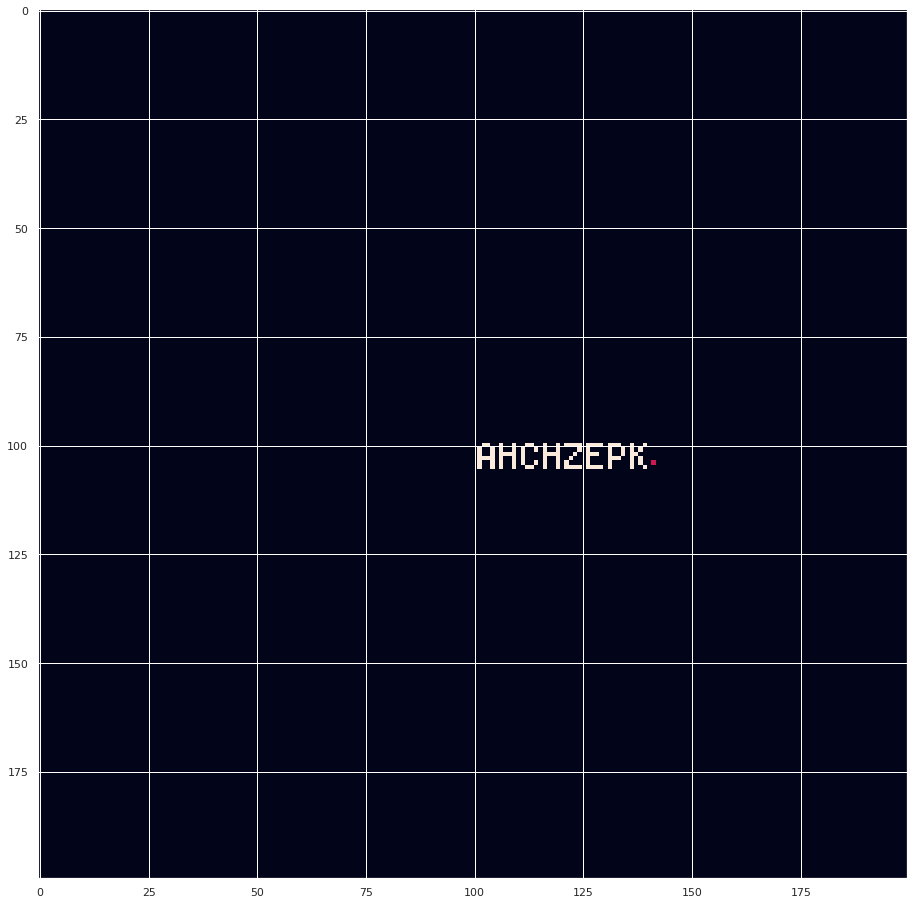

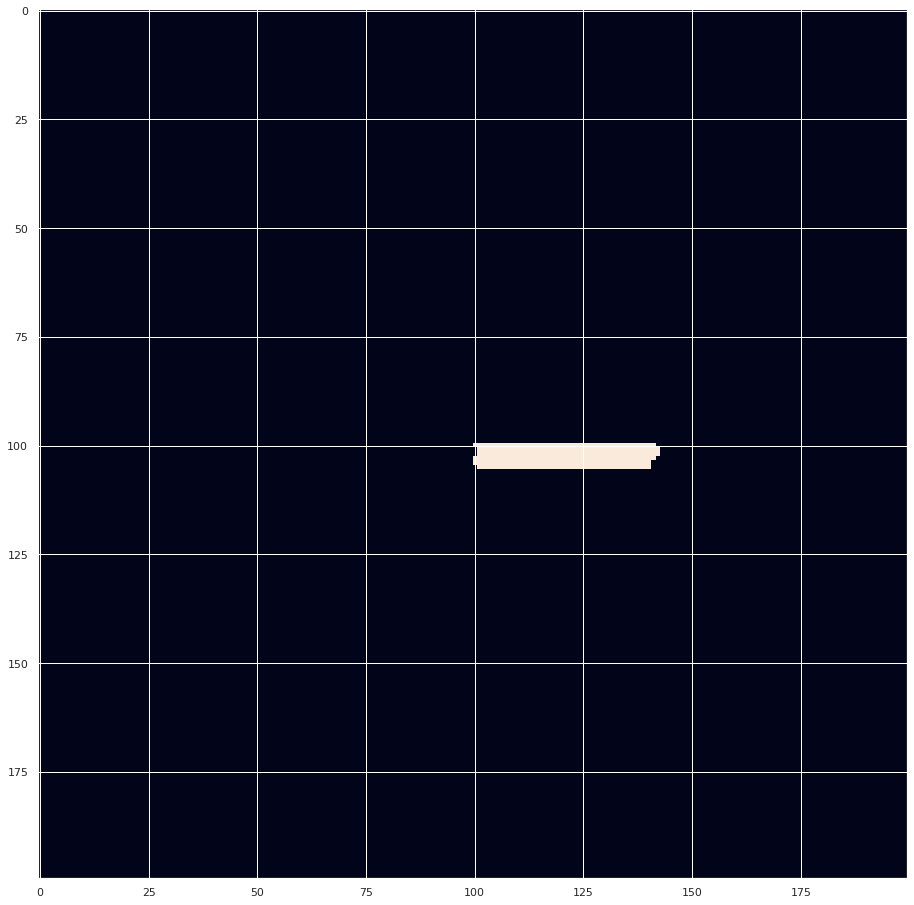

249.0
250


In [124]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#inputs = '3,8,1005,8,352,1106,0,11,0,0,0,104,1,104,0,3,8,102,-1,8,10,101,1,10,10,4,10,108,1,8,10,4,10,102,1,8,28,1,1003,20,10,2,106,11,10,2,1107,1,10,1,1001,14,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,0,10,4,10,1002,8,1,67,2,1009,7,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,108,0,8,10,4,10,101,0,8,92,1,105,9,10,1006,0,89,1,108,9,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,1002,8,1,126,1,1101,14,10,1,1005,3,10,1006,0,29,1006,0,91,3,8,102,-1,8,10,101,1,10,10,4,10,108,1,8,10,4,10,1002,8,1,161,1,1,6,10,1006,0,65,2,106,13,10,1006,0,36,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,198,1,105,15,10,1,1004,0,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,0,10,4,10,101,0,8,228,2,1006,8,10,2,1001,16,10,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,1001,8,0,257,1006,0,19,2,6,10,10,2,4,13,10,2,1002,4,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,1002,8,1,295,3,8,1002,8,-1,10,101,1,10,10,4,10,108,0,8,10,4,10,101,0,8,316,2,101,6,10,1006,0,84,2,1004,13,10,1,1109,3,10,101,1,9,9,1007,9,1046,10,1005,10,15,99,109,674,104,0,104,1,21101,387365315340,0,1,21102,369,1,0,1105,1,473,21101,666685514536,0,1,21102,380,1,0,1106,0,473,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21102,1,46266346536,1,21102,427,1,0,1105,1,473,21101,235152829659,0,1,21101,438,0,0,1105,1,473,3,10,104,0,104,0,3,10,104,0,104,0,21102,838337188620,1,1,21101,461,0,0,1105,1,473,21102,988753429268,1,1,21102,1,472,0,1106,0,473,99,109,2,22101,0,-1,1,21101,40,0,2,21101,504,0,3,21102,494,1,0,1106,0,537,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,499,500,515,4,0,1001,499,1,499,108,4,499,10,1006,10,531,1101,0,0,499,109,-2,2106,0,0,0,109,4,2101,0,-1,536,1207,-3,0,10,1006,10,554,21102,1,0,-3,21202,-3,1,1,21201,-2,0,2,21102,1,1,3,21101,573,0,0,1105,1,578,109,-4,2105,1,0,109,5,1207,-3,1,10,1006,10,601,2207,-4,-2,10,1006,10,601,21201,-4,0,-4,1105,1,669,22101,0,-4,1,21201,-3,-1,2,21202,-2,2,3,21101,620,0,0,1106,0,578,22102,1,1,-4,21101,0,1,-1,2207,-4,-2,10,1006,10,639,21101,0,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,661,22101,0,-1,1,21102,661,1,0,106,0,536,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2106,0,0'.split(',')
inputs = '3,8,1005,8,352,1106,0,11,0,0,0,104,1,104,0,3,8,102,-1,8,10,101,1,10,10,4,10,108,1,8,10,4,10,102,1,8,28,1,1003,20,10,2,106,11,10,2,1107,1,10,1,1001,14,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,0,10,4,10,1002,8,1,67,2,1009,7,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,108,0,8,10,4,10,101,0,8,92,1,105,9,10,1006,0,89,1,108,9,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,1002,8,1,126,1,1101,14,10,1,1005,3,10,1006,0,29,1006,0,91,3,8,102,-1,8,10,101,1,10,10,4,10,108,1,8,10,4,10,1002,8,1,161,1,1,6,10,1006,0,65,2,106,13,10,1006,0,36,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,198,1,105,15,10,1,1004,0,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,0,10,4,10,101,0,8,228,2,1006,8,10,2,1001,16,10,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,1001,8,0,257,1006,0,19,2,6,10,10,2,4,13,10,2,1002,4,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,1002,8,1,295,3,8,1002,8,-1,10,101,1,10,10,4,10,108,0,8,10,4,10,101,0,8,316,2,101,6,10,1006,0,84,2,1004,13,10,1,1109,3,10,101,1,9,9,1007,9,1046,10,1005,10,15,99,109,674,104,0,104,1,21101,387365315340,0,1,21102,369,1,0,1105,1,473,21101,666685514536,0,1,21102,380,1,0,1106,0,473,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21102,1,46266346536,1,21102,427,1,0,1105,1,473,21101,235152829659,0,1,21101,438,0,0,1105,1,473,3,10,104,0,104,0,3,10,104,0,104,0,21102,838337188620,1,1,21101,461,0,0,1105,1,473,21102,988753429268,1,1,21102,1,472,0,1106,0,473,99,109,2,22101,0,-1,1,21101,40,0,2,21101,504,0,3,21102,494,1,0,1106,0,537,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,499,500,515,4,0,1001,499,1,499,108,4,499,10,1006,10,531,1101,0,0,499,109,-2,2106,0,0,0,109,4,2101,0,-1,536,1207,-3,0,10,1006,10,554,21102,1,0,-3,21202,-3,1,1,21201,-2,0,2,21102,1,1,3,21101,573,0,0,1105,1,578,109,-4,2105,1,0,109,5,1207,-3,1,10,1006,10,601,2207,-4,-2,10,1006,10,601,21201,-4,0,-4,1105,1,669,22101,0,-4,1,21201,-3,-1,2,21202,-2,2,3,21101,620,0,0,1106,0,578,22102,1,1,-4,21101,0,1,-1,2207,-4,-2,10,1006,10,639,21101,0,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,661,22101,0,-1,1,21102,661,1,0,106,0,536,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2106,0,0'.split(',')
#inputs = '3,8,1005,8,324,1106,0,11,0,0,0,104,1,104,0,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,1002,8,1,29,2,1102,17,10,3,8,102,-1,8,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,55,2,4,6,10,1,1006,10,10,1,6,14,10,3,8,1002,8,-1,10,101,1,10,10,4,10,1008,8,1,10,4,10,101,0,8,89,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,1002,8,1,110,1,104,8,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,1008,8,1,10,4,10,102,1,8,137,2,9,17,10,2,1101,14,10,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,0,10,4,10,101,0,8,167,1,107,6,10,1,104,6,10,2,1106,6,10,3,8,1002,8,-1,10,101,1,10,10,4,10,108,1,8,10,4,10,1001,8,0,200,1006,0,52,1006,0,70,1006,0,52,3,8,102,-1,8,10,101,1,10,10,4,10,1008,8,1,10,4,10,1002,8,1,232,1006,0,26,1,104,19,10,3,8,102,-1,8,10,1001,10,1,10,4,10,108,0,8,10,4,10,102,1,8,260,1,2,15,10,2,1102,14,10,3,8,1002,8,-1,10,1001,10,1,10,4,10,108,0,8,10,4,10,1001,8,0,290,1,108,11,10,1006,0,36,1006,0,90,1006,0,52,101,1,9,9,1007,9,940,10,1005,10,15,99,109,646,104,0,104,1,21101,0,666412360596,1,21101,341,0,0,1105,1,445,21101,838366659476,0,1,21102,1,352,0,1106,0,445,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,3,10,104,0,104,1,3,10,104,0,104,0,3,10,104,0,104,1,21101,0,97713695975,1,21102,1,399,0,1106,0,445,21102,179469028392,1,1,21101,410,0,0,1105,1,445,3,10,104,0,104,0,3,10,104,0,104,0,21102,1,988220650260,1,21101,433,0,0,1105,1,445,21101,0,838345843560,1,21101,444,0,0,1106,0,445,99,109,2,22101,0,-1,1,21102,1,40,2,21102,1,476,3,21101,466,0,0,1106,0,509,109,-2,2105,1,0,0,1,0,0,1,109,2,3,10,204,-1,1001,471,472,487,4,0,1001,471,1,471,108,4,471,10,1006,10,503,1101,0,0,471,109,-2,2106,0,0,0,109,4,1202,-1,1,508,1207,-3,0,10,1006,10,526,21101,0,0,-3,22101,0,-3,1,22102,1,-2,2,21102,1,1,3,21101,0,545,0,1106,0,550,109,-4,2105,1,0,109,5,1207,-3,1,10,1006,10,573,2207,-4,-2,10,1006,10,573,21201,-4,0,-4,1106,0,641,21201,-4,0,1,21201,-3,-1,2,21202,-2,2,3,21102,592,1,0,1106,0,550,21201,1,0,-4,21101,0,1,-1,2207,-4,-2,10,1006,10,611,21101,0,0,-1,22202,-2,-1,-2,2107,0,-3,10,1006,10,633,22102,1,-1,1,21102,1,633,0,106,0,508,21202,-2,-1,-2,22201,-4,-2,-4,109,-5,2105,1,0'.split(',')
inputs = list(map(int, inputs))

class Amplifier():
    def __init__(self, tape, phase=0, printing=False):
        self.tape = tape
        self.phase = phase
        self.phase_init = False
        self.i = 0
        self.relative_base = 0
        self.ops = {
               1: lambda x, y, i: (x + y, i + 3),
               2: lambda x, y, i: (x * y, i + 3),
               3: lambda x, i: (x, i + 1),
               4: lambda x, i: (x, i + 1),
               5: lambda x, y, i: y if x != 0 else i + 2,
               6: lambda x, y, i: y if x == 0 else i + 2,
               7: lambda x, y, i: (int(x < y), i + 3),
               8: lambda x, y, i: (int(x == y), i + 3),
               9: lambda x, i: (x + self.relative_base, i + 1)
        }
        self.printing = printing

    def get_op_and_modes(self, a):
        a = str(a).zfill(5)
        modes = list(map(int, a[:-2]))
        op = int(a[-2:])
        return op, modes

    def op_mode_convert(self, op, modes, x=None, y=None, out=None):
        if self.printing: print("mode conv before", x, y, out)
        a, b, o = None, None, None
        if x is not None:
            if modes[-1] == 0:
                a = self.tape[x]
                if self.printing: print("position mode on x", a)
            elif modes[-1] == 2:
                a = self.tape[x + self.relative_base]
                if self.printing: print("relative mode on x", a)
            else:
                a = x
                if self.printing: print("immediate mode on x", a)
        if y is not None:
            if modes[-2] == 0:
                b = self.tape[y]
                if self.printing: print("position mode on y", b)
            elif modes[-2] == 2:
                b = self.tape[y + self.relative_base]
                if self.printing: print("relative mode on y", b)
            else:
                b = y
                if self.printing: print("immediate mode on y", b)
        if out is not None:
            mode = modes[-3] if not (x is None and y is None) else modes[-1]
            if mode == 2:
                o = out + self.relative_base
                if self.printing: print("relative mode on out", o)
            else:
                o = out
                if self.printing: print("position mode on out", o)
        else:
            o = out
        return a, b, o

    def increase_memory(self, op, modes, x=None, y=None, out=None):
        l = len(self.tape)
        if x is not None:
            if modes[-1] == 0:
                if x >= len(self.tape):
                    self.tape.extend(list(np.zeros(1 + (x - len(self.tape)))))
            elif modes[-1] == 2:
                x = x + self.relative_base
                if x >= len(self.tape):
                    self.tape.extend(list(np.zeros(1 + (x - len(self.tape)))))
        if y is not None and modes[-2] == 0 and y >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (y - len(self.tape)))))
        if out is not None and modes[-3] == 0 and out >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (out - len(self.tape)))))
        elif out is not None and modes[-3] == 2 and out + self.relative_base >= len(self.tape):
            self.tape.extend(list(np.zeros(1 + (out + self.relative_base - len(self.tape)))))
        if self.printing: print("increased memory from", l, "to", len(self.tape), "with instructions", op, modes, x, y, out, self.relative_base)

    def run(self, input_code):
        while True:
            if self.printing: print(self.tape, self.i, self.relative_base)
            op, modes = self.get_op_and_modes(self.tape[self.i])
            self.i += 1
            if self.printing: print("instruction", op, modes)
            if op == 99: # halt computation
                return None
            elif op in [1, 2, 7, 8]: # addition, multiplication, and comparisons
                x, y, out = self.tape[self.i:self.i + 3]
                if self.printing: print("params", x, y, out)
                self.increase_memory(op, modes, x, y, out)
                a, b, out = self.op_mode_convert(op, modes, x, y, out)
                if self.printing: print("conv params", a, b, out)
                self.tape[out], self.i = self.ops[op](a, b, self.i)
                if self.printing: print("new value at", out, self.tape[out])
            elif op in [3]: # take input
                x = self.phase if not self.phase_init else input_code
                self.phase_init = True
                o = self.tape[self.i]
                if self.printing: print("params", x, o)
                self.increase_memory(op, modes, o)
                _, _, out = self.op_mode_convert(op, modes, None, None, o)
                if self.printing: print("conv params", x, out)
                self.tape[out], self.i = self.ops[op](x, self.i)
                if self.printing: print("new value at", out, self.tape[out])
            elif op in [4]: # output value
                x = self.tape[self.i]
                if self.printing: print("params", x)
                self.increase_memory(op, modes, x)
                a, _, _ = self.op_mode_convert(op, modes, x)
                if self.printing: print("conv params", a)
                x, self.i = self.ops[op](a, self.i)
                if self.printing: print("new output", x)
                return x
            elif op in [5, 6]: # jump instructions
                x, y = self.tape[self.i:self.i + 2]
                if self.printing: print("params", x, y)
                self.increase_memory(op, modes, x, y)
                a, b, _ = self.op_mode_convert(op, modes, x, y)
                if self.printing: print("conv params", a, b)
                self.i = self.ops[op](a, b, self.i)
                if self.printing: print("new i", self.i)
            elif op in [9]:
                x = self.tape[self.i]
                if self.printing: print("params", x)
                a, _, _ = self.op_mode_convert(op, modes, x, None, None)
                if self.printing: print("conv params", a)
                self.relative_base, self.i = self.ops[op](a, self.i)
                if self.printing: print("new RB", self.relative_base)

class Robot():
    def __init__(self, program, n=100, r=0):
        self.n = n
        self.x = n // 2
        self.y = n // 2
        self.r = r # 0: up, 1: right, 2: down, 3: left
        self.move_dict = {
            0: (-1, 0),
            1: (0, 1),
            2: (1, 0),
            3: (0, -1)
        }

        self.amp = Amplifier(program)
        self.amp.phase_init = True
        self.outputs = []

        self.grid = np.zeros((n, n))
        self.mask = np.zeros((n, n))
        
        self.visited = [self.pos_to_str(self.y, self.x)]

    def pos_to_str(self, x, y):
        return f'{y}/{x}'

    def visit(self):
        v = self.pos_to_str(self.y, self.x)
        if v not in self.visited:
            self.visited.append(v)

    def paint(self, colour):
        self.grid[self.y, self.x] = colour
        self.mask[self.y, self.x] = 1

    def get_colour(self):
        return self.grid[self.y, self.y]

    def turn(self, d):
        d = -1 if d == 0 else d
        self.r = (self.r + d) % 4

    def move(self, l=1):
        self.y += self.move_dict[self.r][0]
        self.x += self.move_dict[self.r][1]
        if self.y < 0 or self.y > self.n:
            print('out of bounds', self.y, self.x)
        if self.x < 0 or self.x > self.n:
            print('out of bounds', self.y, self.x)

    def visualise(self, mask=False):
        plt.figure(figsize=(16, 16))
        g = self.grid.copy()
        g[self.y, self.x] = 0.5
        if mask:
            plt.imshow(self.mask)
        else:
            plt.imshow(g)
        plt.show()

    def act(self, input_code=0): # starting tile is black
        self.outputs.append(input_code)
        actions = []
        i = 0
        while True:
            #print(self.y, self.x)
            #print(input_code)
            #self.visualise()
            #if i == 1000:
            #    self.visualise()
            #    i = 0
            input_code = self.amp.run(input_code)
            if input_code is None:
                print("current actions", actions)
                break
            actions.append(input_code)
            if len(actions) == 2:
                # colour in grid and move robot
                colour, rotation = actions
                #print("colour", colour, "rotation", rotation)
                self.paint(colour)
                self.turn(rotation)
                self.move()
                self.visit()
                tile_colour = self.get_colour()
                #print("new colour", tile_colour)
                actions = []
                #self.outputs.append(tile_colour)
            i += 1
        #return outputs

robot = Robot(inputs, 200)
robot.act(1)
robot.visualise()
robot.visualise(mask=True)
print(robot.mask.sum())
print(len(robot.visited))

In [261]:
import numpy as np
import itertools
from tqdm import tqdm
import math

inputs = '''<x=-4, y=-14, z=8>
<x=1, y=-8, z=10>
<x=-15, y=2, z=1>
<x=-17, y=-17, z=16>'''.splitlines()

#inputs = '''<x=-1, y=0, z=2>
#<x=2, y=-10, z=-7>
#<x=4, y=-8, z=8>
#<x=3, y=5, z=-1>'''.splitlines()

#inputs = '''<x=-8, y=-10, z=0>
#<x=5, y=5, z=10>
#<x=2, y=-7, z=3>
#<x=9, y=-8, z=-3>'''.splitlines()

inputs = [str_to_pos(s) for s in inputs]

def str_to_pos(s):
    s = s[1:-1]
    s = s.split(', ')
    return [int(p[2:]) for p in s]


def lcm(a, b):
    return abs(a * b) // math.gcd(a, b)

class Moon():
    def __init__(self, x, y, z, name=''):
        self.name = name

        self.x = x
        self.y = y
        self.z = z
        
        self.vx = 0
        self.vy = 0
        self.vz = 0

        self.other_moons = []

    def register_other_moons(self, moons):
        self.other_moons.extend(moons)

    def pos(self):
        return self.x, self.y, self.z

    def vel(self):
        return self.vx, self.vy, self.vz

    def update_velocity(self, dv):
        self.vx += dv[0]
        self.vy += dv[1]
        self.vz += dv[2]

    def move(self):
        self.x += self.vx
        self.y += self.vy
        self.z += self.vz

    def potential_energy(self):
        return sum([abs(p) for p in self.pos()])

    def kinetic_energy(self):
        return sum([abs(p) for p in self.vel()])

    def energy(self):
        return self.potential_energy() * self.kinetic_energy()

    def __str__(self):
        return f'{self.name:>10}\tpos: {self.pos()}, vel: {self.vel()}, pot: {self.potential_energy()}, kin: {self.kinetic_energy()}'

    def __repr__(self):
        return f'{self.name:>10}\tpos: {self.pos()}, vel: {self.vel()}, pot: {self.potential_energy()}, kin: {self.kinetic_energy()}'

class PlanetarySystem():
    def __init__(self, moons):
        self.moons = moons

    def apply_gravity(self):
        pairs = itertools.combinations(self.moons, 2)
        for u, v in pairs:
            du = self.compare(u, v)
            u.update_velocity(du)
            v.update_velocity([-d for d in du])

    def compare(self, u, v):
        dx, dy, dz = (0, 0, 0)
        dx, dy, dz = dx + int(u.x < v.x), dy + int(u.y < v.y), dz + int(u.z < v.z)
        dx, dy, dz = dx - int(u.x > v.x), dy - int(u.y > v.y), dz - int(u.z > v.z)
        return dx, dy, dz

    def move(self):
        for moon in self.moons:
            moon.move()

    def total_energy(self):
        return sum([moon.energy() for moon in self.moons])

    def log(self):
        print(f'timestep {t}')
        for moon in self.moons:
            print(moon)

    def __str__(self):
        return str([moon for moon in self.moons])

    def __repr__(self):
        return str([moon for moon in self.moons])

    def x_repr(self):
        return str([(moon.x, moon.vx) for moon in self.moons])

    def y_repr(self):
        return str([(moon.y, moon.vy) for moon in self.moons])

    def z_repr(self):
        return str([(moon.z, moon.vz) for moon in self.moons])

moon_names = ['Io', 'Europa', 'Ganymede', 'Callisto']
moons = [Moon(*pos, name=moon_names[i]) for i, pos in enumerate(inputs)]
for moon in moons:
    other_moons = moons[:]
    other_moons.remove(moon)
    moon.register_other_moons(other_moons)

planetary_system = PlanetarySystem(moons)

timesteps = int(10e6)

states = {}
x_states, x_period = {}, None
y_states, y_period = {}, None
z_states, z_period = {}, None
step = None

starting_total_energy = planetary_system.total_energy()

for t in range(timesteps):
    if (x_period is not None) and (y_period is not None) and (z_period is not None):
        period = np.lcm.reduce([x_period, y_period, z_period])
        print(f'Starts repeating at timestep {period}')
        planetary_system.log()
        step = t
        break
    if x_period is None:
        if planetary_system.x_repr() not in x_states:
            x_states[planetary_system.x_repr()] = True
        else:
            x_period = t
    if y_period is None:
        if planetary_system.y_repr() not in y_states:
            y_states[planetary_system.y_repr()] = True
        else:
            y_period = t
    if z_period is None:
        if planetary_system.z_repr() not in z_states:
            z_states[planetary_system.z_repr()] = True
        else:
            z_period = t
    planetary_system.apply_gravity()
    planetary_system.move()
print(f'Total energy: {planetary_system.total_energy()}')

Starts repeating at timestep 360689156787864
timestep 286333
        Io	pos: (-1007, -13, -100), vel: (-19, 1, 7), pot: 1120, kin: 27
    Europa	pos: (823, -9, -387), vel: (11, -1, -4), pot: 1219, kin: 16
  Ganymede	pos: (949, -1, 689), vel: (11, -3, 44), pot: 1639, kin: 58
  Callisto	pos: (-800, -14, -167), vel: (-3, 3, -47), pot: 981, kin: 53
Total energy: 196799
